# 비어플 4주차 과제 - 따릉이 데이터 EDA(2)
#### 2022110484 장윤서

## 변수 설명 





Date (날짜) : year-month-day

Rented Bike count (자전거 대여량) :Count of bikes rented at each hour

Hour (그 날의 시간) : Hour of he day (0-23) 

Temperature (온도) : Temperature in Celsius

Humidity (습도) : %

Windspeed (풍속) : m/s

Visibility (가시성) : 10m

Dew point temperature (이슬점 온도)  : Celsius

Solar radiation (태양 복사) : MJ/m2

Rainfall (강우량) : mm

Snowfall (강설량) : cm

Seasons (계절) :Winter, Spring, Summer, Autumn #범주형

Holiday (휴일) :Holiday/No holiday             #범주형 

Functional Day(운영시간) : Yes/No   #범주형



## 분석 목적 

#### target 변수인 자전거 대여량을 다른 변수를 가지고 예측하기 


1. 따릉이의 이용목적: 

2019년 따릉이 만족도 설문조사에 따르면 36.3%가 출퇴근용, 26.8%가 여가 및 취미, 17%가 운동 목적으로 따릉이를 이용한다고 답했다.

날짜=> 요일 변수 추출해서 평일과 주말의 이용량 살펴보기


시간대=> 평일 출,퇴근 시간대의 따릉이의 이용량 살펴보기 : 출퇴근용 (7-9 // 6-8)

   => 주말의 시간대 확인해서 어떤 시간대에 따릉이 이용량이 높은지 : 여가용 


휴일 변수=> H-oliday 인 날은 어떤 날인가 주말 or 공휴일인지 확인해보기 
         => Holiday인 날의 Date에서 확인해보기 
         


2) 운영하는 날 

운영을 안 하는 날은 제거한 운영하는 날만을 분석하도록 하자 
운영을 안 하는 날은 어떤 점에서 운영을 안 하는 지 찾아보자 

=> 따릉이 운영을 안 하는 날은 기상악화인 날




날씨의 영향, 휴일, 시간의 영향을 많이 받을 거 같음 

## 라이브러리 불러오기 

In [1]:
#라이브러리 임포트하기 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
%config InlineBackend.figure_format = 'retina'  #선명하게 만들기

# 결측치 확인하는 라이브러리
import missingno as msno 

# 다중대체 라이브러리
from fancyimpute import IterativeImputer

# seaborn의 다른 라이브러리
import seaborn.objects as so

# Warning 메세지를 뜨지 않게 해줌
import warnings
warnings.filterwarnings('ignore')

## 데이터 불러오기 

In [2]:
bike=pd.read_csv('C:/Users/jys72/code/따릉이train.csv',encoding='ISO-8859-1')

In [3]:
df=bike.copy() # 원본 데이터 손실 방지를 위한 copy

## EDA

In [4]:
df.head(10) # 앞의 5개 행 추출 

,Date,Rented Bike Count,Hour,Temperature(ì§¸C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(ì§¸C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,NaN,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,NaN,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,NaN,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,NaN,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [6]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(ì§¸C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(ì§¸C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8035,31/10/2018,1507,19,8.4,53,NaN,2000,-0.6,0.0,0.0,0.0,Autumn,No Holiday,Yes
8036,31/10/2018,1176,20,7.6,59,0.7,2000,0.0,0.0,0.0,0.0,NaN,No Holiday,Yes
8037,31/10/2018,1069,21,7.6,59,3.0,1929,0.0,0.0,0.0,0.0,Autumn,No Holiday,Yes
8038,31/10/2018,1088,22,6.8,58,2.2,1936,-0.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8039,31/10/2018,798,23,6.4,60,1.8,1930,-0.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


### 변수변환

##### 변수 타입 재지정 하기: 날짜변수 , 범주형 변수

In [5]:
#변수 타입 확인하기 
df.info()  #날짜변수 ,계절변수, Holiday,Functioning Day

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8040 entries, 0 to 8039
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         8040 non-null   object 
 1   Rented Bike Count            8040 non-null   int64  
 2   Hour                         8040 non-null   int64  
 3   Temperature(ì§¸C)            7240 non-null   float64
 4   Humidity(%)                  8040 non-null   int64  
 5   Wind speed (m/s)             7238 non-null   float64
 6   Visibility (10m)             8040 non-null   int64  
 7   Dew point temperature(ì§¸C)  8040 non-null   float64
 8   Solar Radiation (MJ/m2)      8040 non-null   float64
 9   Rainfall(mm)                 8040 non-null   float64
 10  Snowfall (cm)                8040 non-null   float64
 11  Seasons                      7238 non-null   object 
 12  Holiday                      8040 non-null   object 
 13  Functioning Day   

In [10]:
#불필요변수 제거 
#df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
df['Functioning Day'].unique()  # Functioning Day 변수는 Yes 와 No로 나타남

array(['Yes', 'No'], dtype=object)

In [7]:
df['Hour'].unique() #Hour 변수는 0-23시까지의 빌린 당일 시간을 나타냄 

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [8]:
#날짜변수 변환하기 
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')


In [9]:
# 범주형 변수 변환하기 
df['Seasons']=df['Seasons'].astype('category')
df['Holiday']=df['Holiday'].astype('category')
df['Functioning Day']=df['Functioning Day'].astype('category')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8040 entries, 0 to 8039
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         8040 non-null   datetime64[ns]
 1   Rented Bike Count            8040 non-null   int64         
 2   Hour                         8040 non-null   int64         
 3   Temperature(ì§¸C)            7240 non-null   float64       
 4   Humidity(%)                  8040 non-null   int64         
 5   Wind speed (m/s)             7238 non-null   float64       
 6   Visibility (10m)             8040 non-null   int64         
 7   Dew point temperature(ì§¸C)  8040 non-null   float64       
 8   Solar Radiation (MJ/m2)      8040 non-null   float64       
 9   Rainfall(mm)                 8040 non-null   float64       
 10  Snowfall (cm)                8040 non-null   float64       
 11  Seasons                      7238 non-null 

### 파생변수

##### 월 , 요일 변수 생성하기 

In [11]:
#날짜 변수에서 월 변수 추출하기 
df['month']=df['Date'].dt.month

In [12]:
#날짜 변수에서 요일 변수 추출하기 
df['Day_of_Week'] = df['Date'].dt.day_name()

#요일 변수 범주형 처리하기 
df['Day_of_Week']=df['Day_of_Week'].astype('category')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8040 entries, 0 to 8039
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         8040 non-null   datetime64[ns]
 1   Rented Bike Count            8040 non-null   int64         
 2   Hour                         8040 non-null   int64         
 3   Temperature(ì§¸C)            7240 non-null   float64       
 4   Humidity(%)                  8040 non-null   int64         
 5   Wind speed (m/s)             7238 non-null   float64       
 6   Visibility (10m)             8040 non-null   int64         
 7   Dew point temperature(ì§¸C)  8040 non-null   float64       
 8   Solar Radiation (MJ/m2)      8040 non-null   float64       
 9   Rainfall(mm)                 8040 non-null   float64       
 10  Snowfall (cm)                8040 non-null   float64       
 11  Seasons                      7238 non-null 

### 결측값 처리하기 
##### 다중대체: 온도, 풍속 변수 
##### 월별 변수로 대체: 계절변수

In [14]:
#결측값 확인하기 온도 , 풍속, 계절 변수 
df.isna().sum() 

Date                             0
Rented Bike Count                0
Hour                             0
Temperature(ì§¸C)              800
Humidity(%)                      0
Wind speed (m/s)               802
Visibility (10m)                 0
Dew point temperature(ì§¸C)      0
Solar Radiation (MJ/m2)          0
Rainfall(mm)                     0
Snowfall (cm)                    0
Seasons                        802
Holiday                          0
Functioning Day                  0
month                            0
Day_of_Week                      0
dtype: int64

<Axes: >

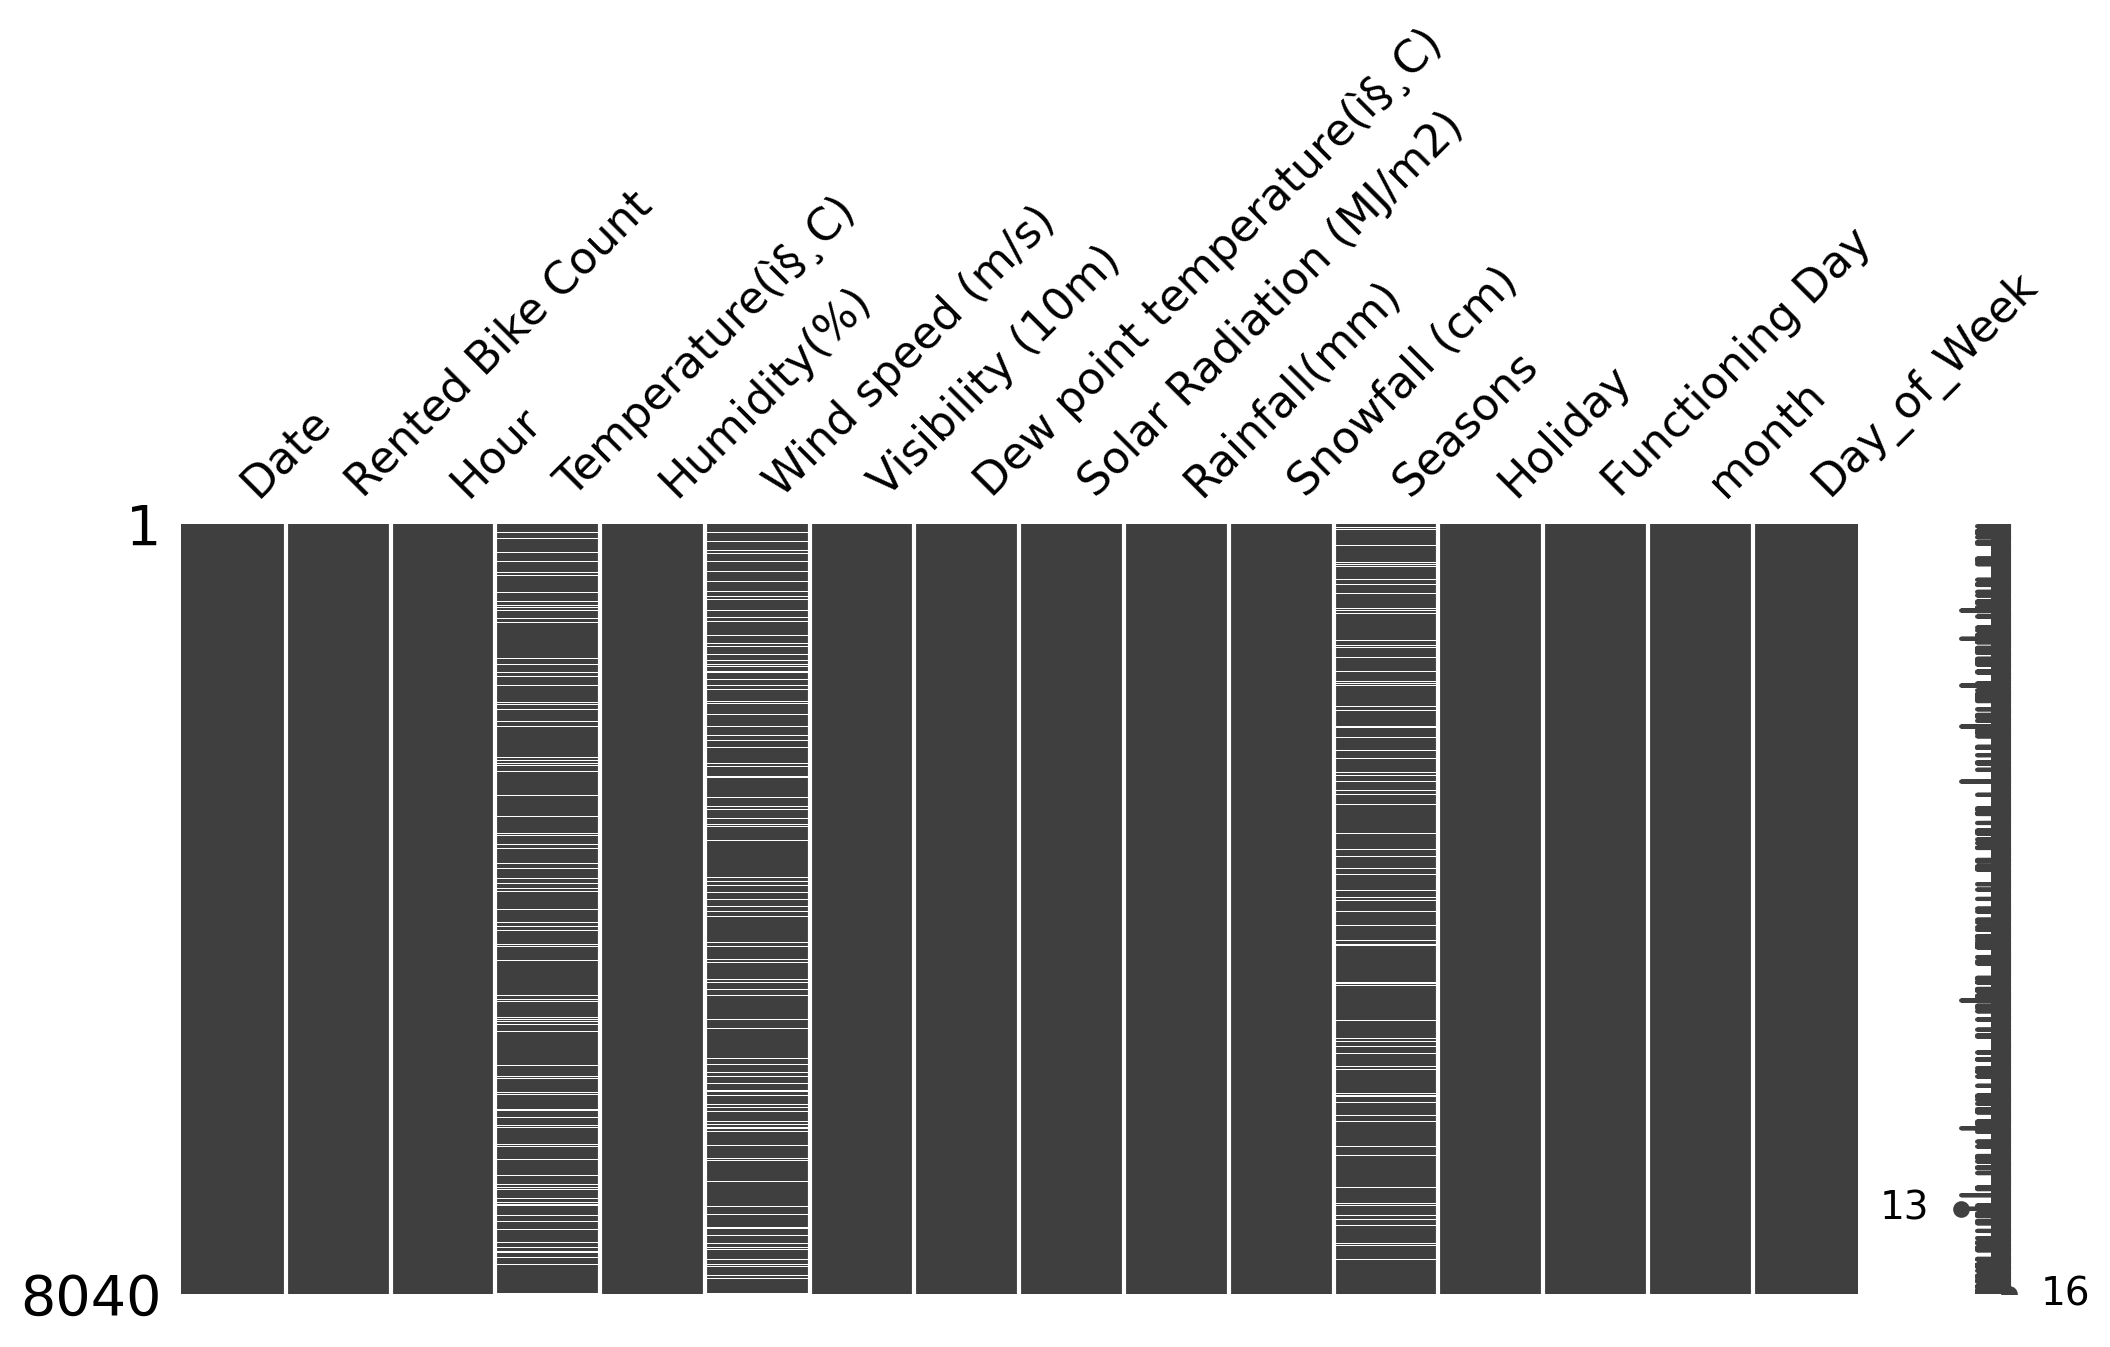

In [15]:
#결측값 시각화해서 살펴보기 
msno.matrix(df,figsize=(12,5))

In [16]:
# 대체 -다중대체법: 온도변수 
df._get_numeric_data().corr()['Temperature(ì§¸C)'].sort_values()

Snowfall (cm)                 -0.243888
Wind speed (m/s)              -0.056962
Visibility (10m)               0.033322
Rainfall(mm)                   0.049341
Hour                           0.111295
Humidity(%)                    0.166340
month                          0.294145
Solar Radiation (MJ/m2)        0.349506
Rented Bike Count              0.549391
Dew point temperature(ì§¸C)    0.917007
Temperature(ì§¸C)              1.000000
Name: Temperature(ì§¸C), dtype: float64

In [17]:
imputer = IterativeImputer()
imputed_arr=imputer.fit_transform(df[['Dew point temperature(ì§¸C)', 'Solar Radiation (MJ/m2)', 'month', 'Temperature(ì§¸C)']])
df['Temperature(ì§¸C)']=pd.DataFrame(imputed_arr, columns=['Dew point temperature(ì§¸C)', 'Solar Radiation (MJ/m2)', 'month', 'Temperature(ì§¸C)'])['Temperature(ì§¸C)'].round(1)

In [18]:
print(df['Temperature(ì§¸C)'].isna().sum())

0


In [19]:
df.head(10)

,Date,Rented Bike Count,Hour,Temperature(ì§¸C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(ì§¸C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,Day_of_Week
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,NaN,No Holiday,Yes,12,Friday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,12,Friday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes,12,Friday
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,12,Friday
4,2017-12-01,78,4,-6.0,36,NaN,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes,12,Friday
5,2017-12-01,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes,12,Friday
6,2017-12-01,181,6,-8.1,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes,12,Friday
7,2017-12-01,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes,12,Friday
8,2017-12-01,930,8,-8.3,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes,12,Friday
9,2017-12-01,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes,12,Friday


In [20]:
df._get_numeric_data().corr()['Wind speed (m/s)'].sort_values()

Humidity(%)                   -0.344381
Dew point temperature(ì§¸C)   -0.196218
month                         -0.137190
Temperature(ì§¸C)             -0.060678
Rainfall(mm)                  -0.032976
Snowfall (cm)                 -0.000537
Rented Bike Count              0.115569
Visibility (10m)               0.160908
Hour                           0.287398
Solar Radiation (MJ/m2)        0.330732
Wind speed (m/s)               1.000000
Name: Wind speed (m/s), dtype: float64

In [21]:
#대체-다중대체 : 풍속변수
imputer = IterativeImputer()
imputed_arr=imputer.fit_transform(df[['Humidity(%)', 'Solar Radiation (MJ/m2)', 'Hour', 'Wind speed (m/s)']])
df['Wind speed (m/s)']=pd.DataFrame(imputed_arr, columns=['Humidity(%)', 'Solar Radiation (MJ/m2)', 'Hour', 'Wind speed (m/s)'])['Wind speed (m/s)'].round(1)

In [22]:
#대체-월별 변수로 대체하기: 계절변수 
#월 변수에서 봄 여름 가을 겨울에 해당하는 달을 찾기 
print(f"겨울:{df[df['Seasons']=='Winter']['Date'].dt.month.unique()}")
print(f"봄:{df[df['Seasons']=='Spring']['Date'].dt.month.unique()}")
print(f"여름:{df[df['Seasons']=='Summer']['Date'].dt.month.unique()}")
print(f"가을:{df[df['Seasons']=='Autumn']['Date'].dt.month.unique()}")

겨울:[12  1  2]
봄:[3 4 5]
여름:[6 7 8]
가을:[ 9 10]


In [23]:
# 계절 결측치를 월로 대체
df['Seasons'] = df['Seasons'].fillna(df['month'].map({1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Autumn', 10: 'Autumn', 12: 'Winter'}))


In [24]:
df.isna().sum()

Date                           0
Rented Bike Count              0
Hour                           0
Temperature(ì§¸C)              0
Humidity(%)                    0
Wind speed (m/s)               0
Visibility (10m)               0
Dew point temperature(ì§¸C)    0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Seasons                        0
Holiday                        0
Functioning Day                0
month                          0
Day_of_Week                    0
dtype: int64

In [25]:
#결측치 처리 , 파생변수(달, 요일) 만든 데이터 프레임 
df.head()

,Date,Rented Bike Count,Hour,Temperature(ì§¸C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(ì§¸C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,Day_of_Week
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Friday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Friday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Friday
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Friday
4,2017-12-01,78,4,-6.0,36,1.6,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Friday


In [197]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(ì§¸C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(ì§¸C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,Day_of_Week
8035,2018-10-31,1507,19,8.4,53,1.9,2000,-0.6,0.0,0.0,0.0,Autumn,No Holiday,Yes,10,Wednesday
8036,2018-10-31,1176,20,7.6,59,0.7,2000,0.0,0.0,0.0,0.0,Autumn,No Holiday,Yes,10,Wednesday
8037,2018-10-31,1069,21,7.6,59,3.0,1929,0.0,0.0,0.0,0.0,Autumn,No Holiday,Yes,10,Wednesday
8038,2018-10-31,1088,22,6.8,58,2.2,1936,-0.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,10,Wednesday
8039,2018-10-31,798,23,6.4,60,1.8,1930,-0.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,10,Wednesday


### 이상치 처리하기 

In [26]:
df.describe() 

,Rented Bike Count,Hour,Temperature(ì§¸C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(ì§¸C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month
count,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000
mean,709.775995,11.500000,13.368383,58.271020,1.755709,1459.170896,4.522239,0.587072,0.152164,0.066493,6.125373
std,657.320605,6.922617,12.232262,20.340492,1.002255,603.716284,13.393517,0.886186,1.127026,0.378182,3.316712
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000
25%,191.000000,5.750000,3.400000,43.000000,1.000000,977.000000,-4.600000,0.000000,0.000000,0.000000,3.000000
50%,485.000000,11.500000,15.350000,57.000000,1.600000,1741.000000,6.400000,0.020000,0.000000,0.000000,6.000000
75%,1080.500000,17.250000,23.200000,74.000000,2.300000,2000.000000,15.600000,0.960000,0.000000,0.000000,9.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,5.100000,12.000000


In [211]:
# 따릉이 대여량의 평균은 약 700대이며 
# 따릉이를 대여하는 평균 시간은 11시이다 

Text(0.5, 1.0, 'correlation heatmap')

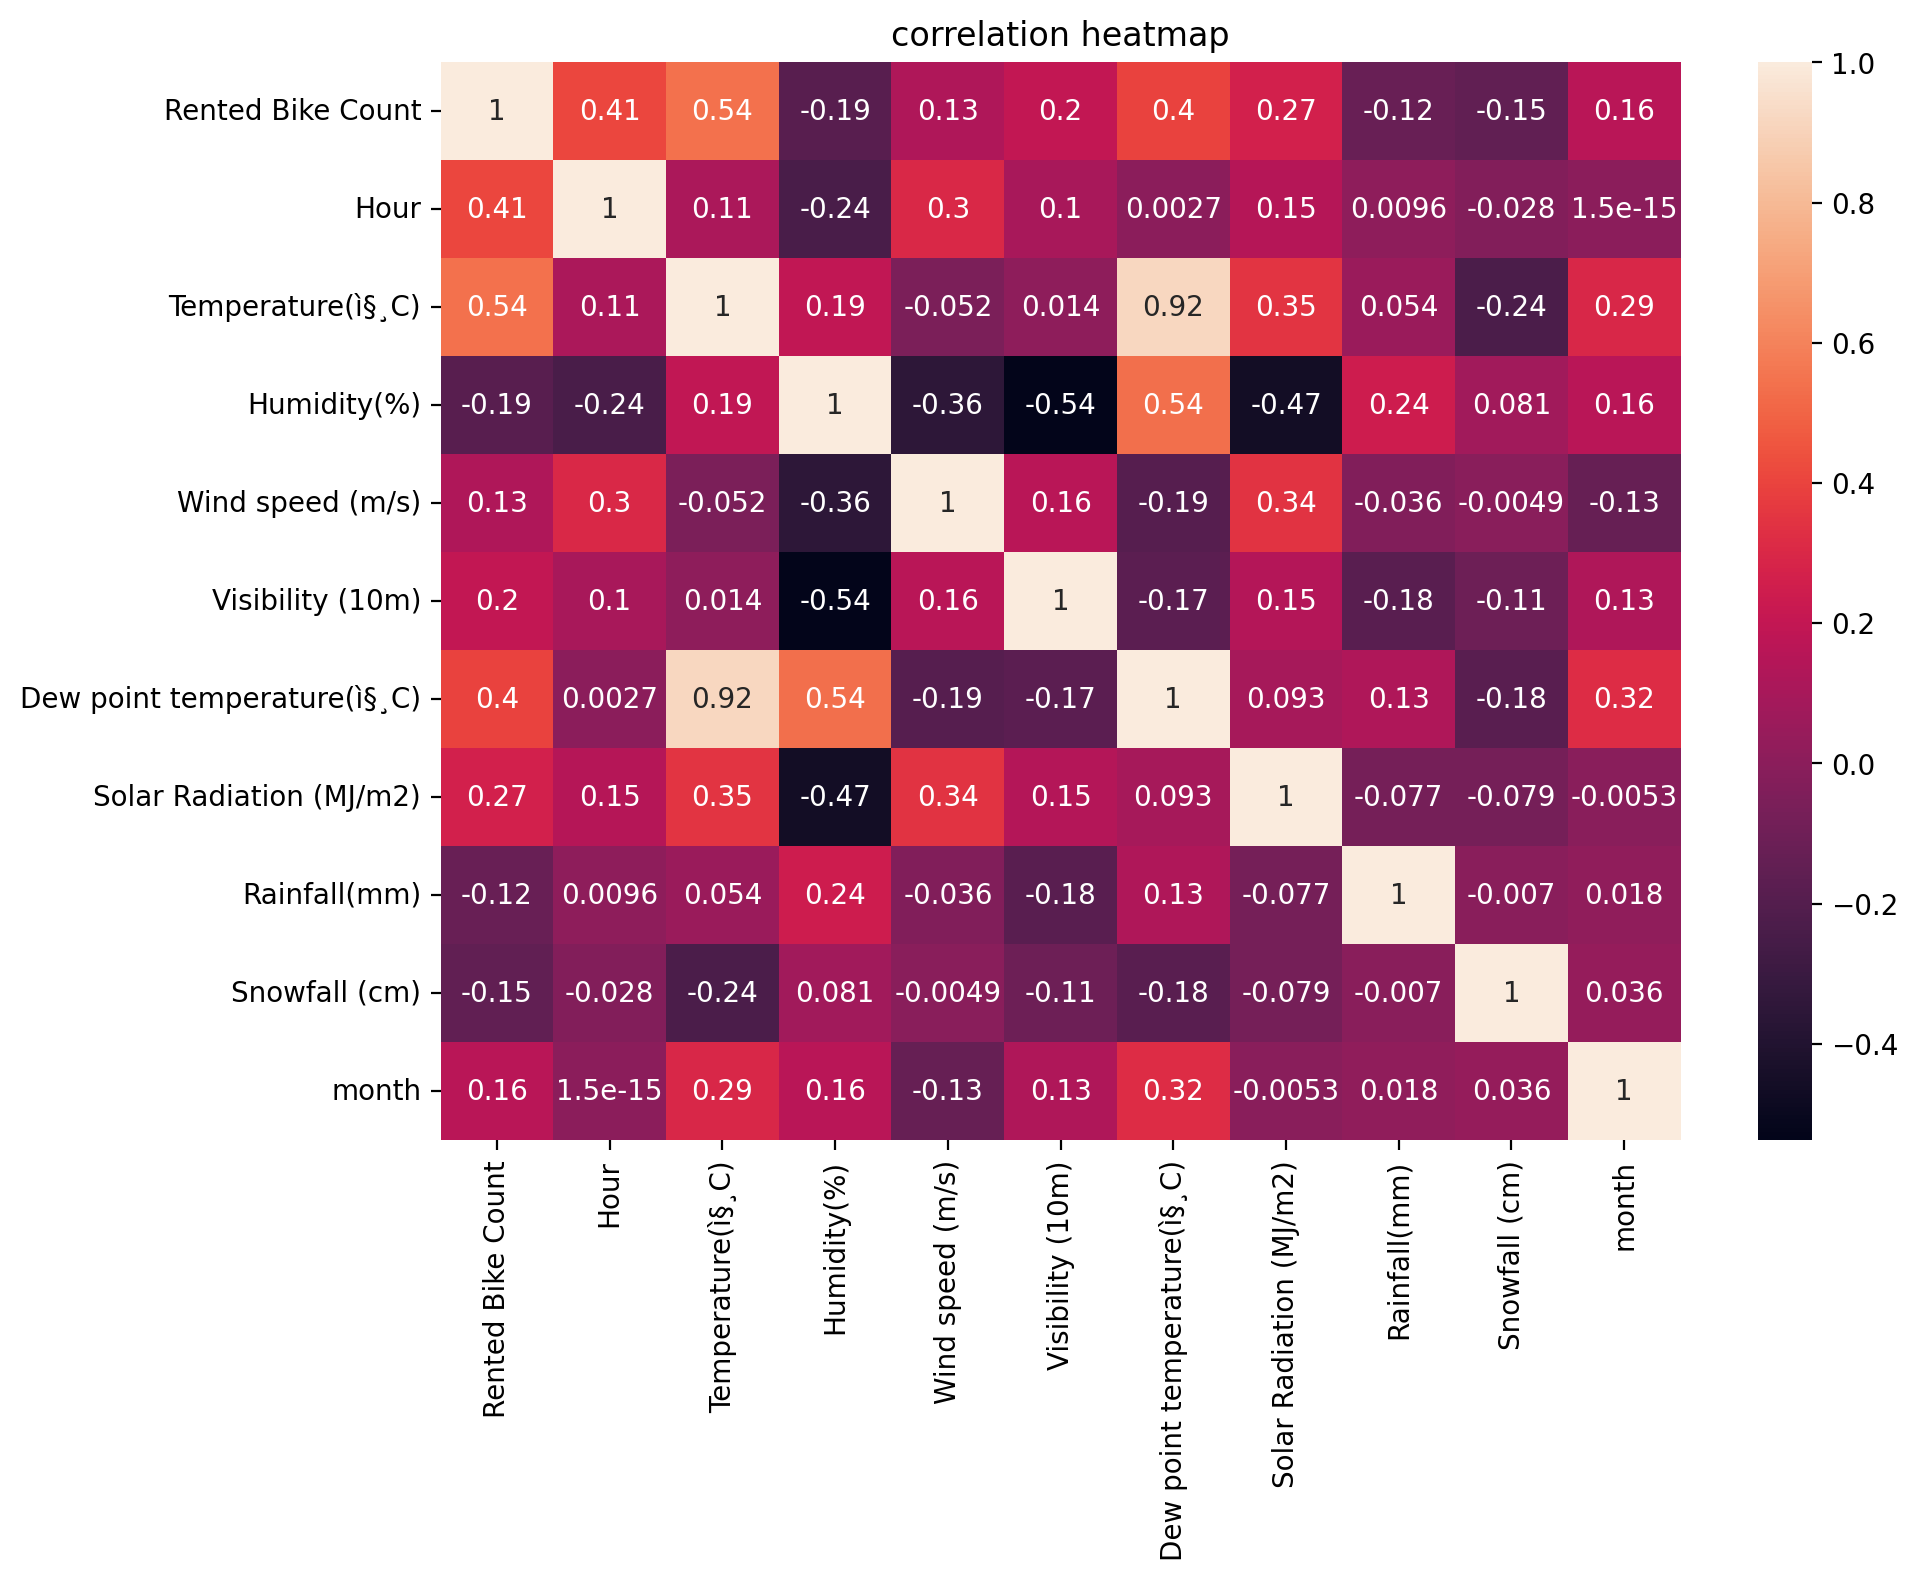

In [27]:
#변수별 상관관계 살펴보기 
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.title('correlation heatmap') #상관계수 행렬 히트맵

##### 온도와 따릉이 대여량간의 상관관계가 0.54로 높게 나타난다 
##### 그 다음으로는 시간대가 0.41로 높은 상관관계를 가진다
##### 온도와 이슬점 사이의 0.92으로 높은 상관관계를 가진다 
##### 가시성과 습도간의  -0.55로 높은 상관관계가 있다 
##### 습도와 이슬점 사이에 0.54로 높은 상관관계가 있다
##### 습도와 태양복사 에너지 간의 -0.46 으로 상관관계가 존재한다

## Functioning 변수 

##### 운영을 안 하는 날은 어떠한 특징이 있는 지 한 번 살펴보기 

In [28]:
df[df['Functioning Day']=='No']['Rented Bike Count'].unique()
# 운영 안하는 날의 바이크 수는 0대이다 따라서 운영을 하는 날을 가지고서 분석을 진행하기 위해 나눈다 

array([0], dtype=int64)

In [29]:
#df2: 운영 안 하는 날만 따로 데이터 프레임을 만들었다 
df2=df[df['Functioning Day']=='No']

In [30]:
#df3:운영하는 날에만 따로 데이터 프레임 만들기 
df3=df[df['Functioning Day']=='Yes']

#### 요일 변수 뽑아보기 

In [31]:
#운영을 안 한 요일: 화,수,목, 금, 토, 일 
df2['Day_of_Week'].unique()

['Wednesday', 'Thursday', 'Tuesday', 'Friday', 'Sunday', 'Saturday']
Categories (7, object): ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']

In [32]:
#따릉이가 운행을 안한 날짜 확인해보기 
df2['Date'].unique()

array(['2018-04-11T00:00:00.000000000', '2018-05-10T00:00:00.000000000',
       '2018-09-18T00:00:00.000000000', '2018-09-19T00:00:00.000000000',
       '2018-09-28T00:00:00.000000000', '2018-09-30T00:00:00.000000000',
       '2018-10-02T00:00:00.000000000', '2018-10-04T00:00:00.000000000',
       '2018-10-06T00:00:00.000000000', '2018-10-09T00:00:00.000000000'],
      dtype='datetime64[ns]')

###### 월요일에는 꼭 따릉이가 운영을 했고 운행을 안 한 날을 살펴보면 날짜 상의 큰 특징이 있는 것으로 보이진 않는다 


#### 이용약관에 따르면 기상악화현상이 일어나는 경우 따릉이의 이용이 중지될 수도 있다고 함 => 예로 폭우가 있다 

#### 따라서 강우량, 강설량 , 풍속 변수를 확인하기

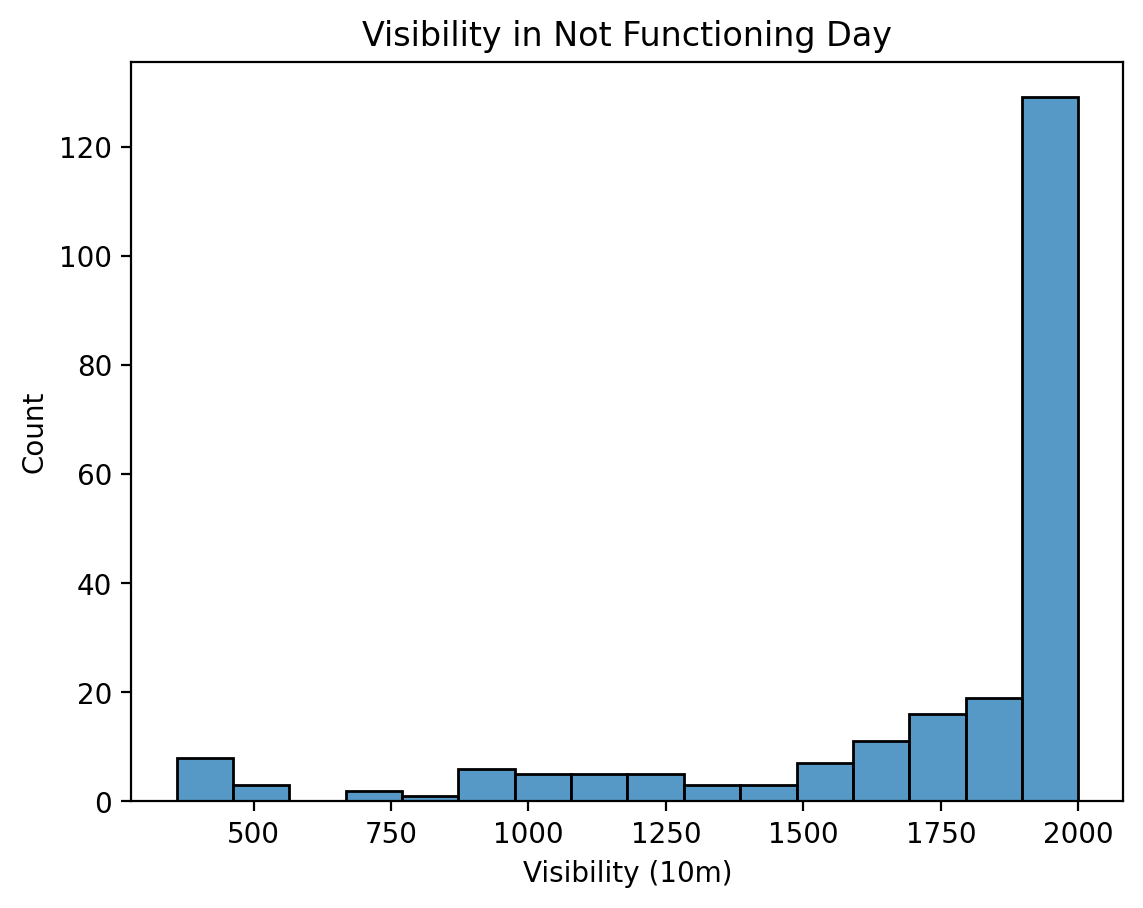

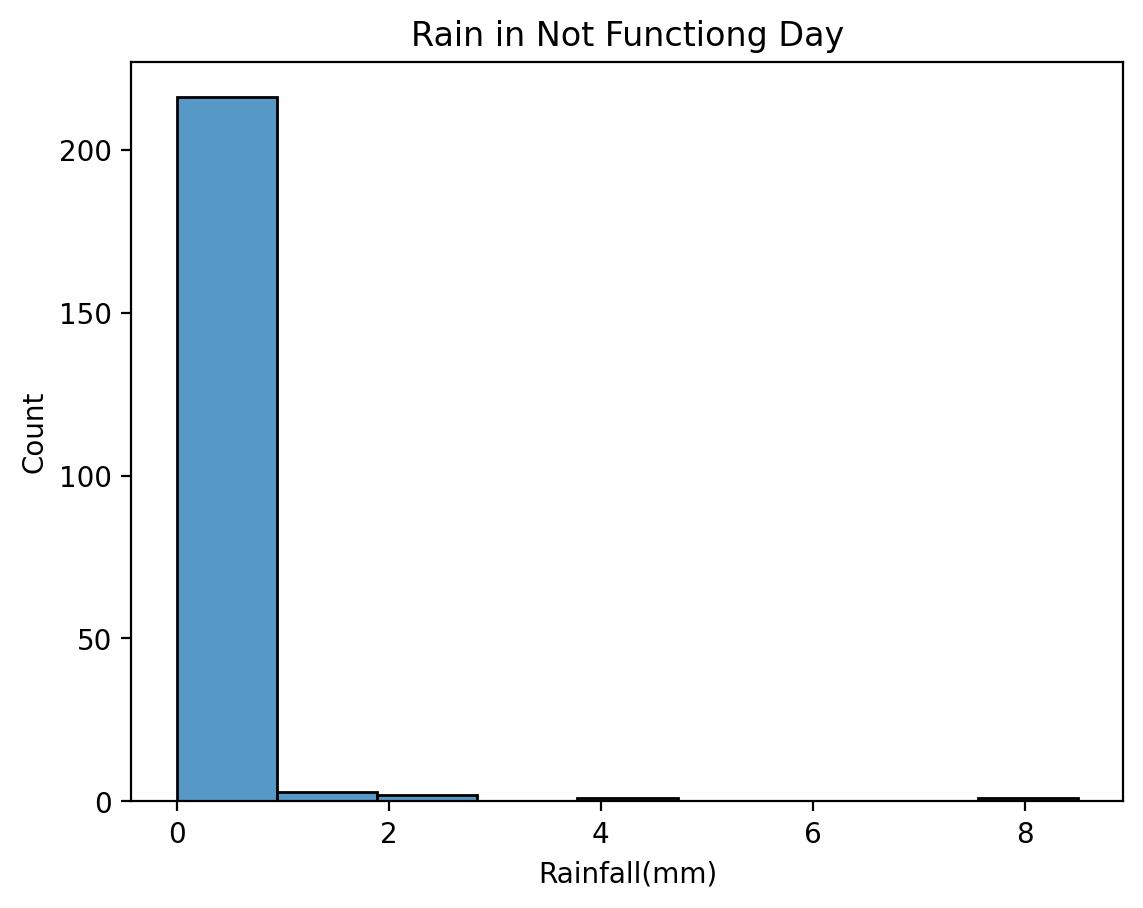

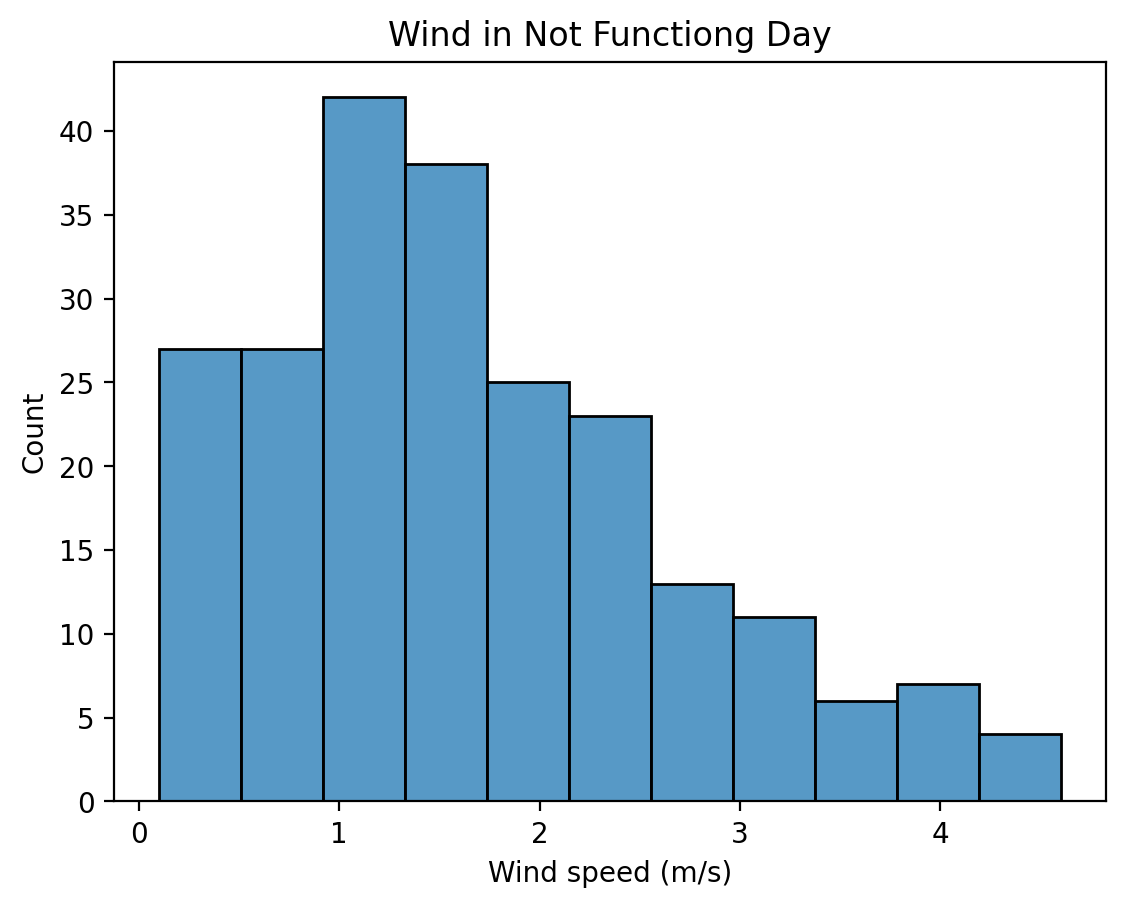

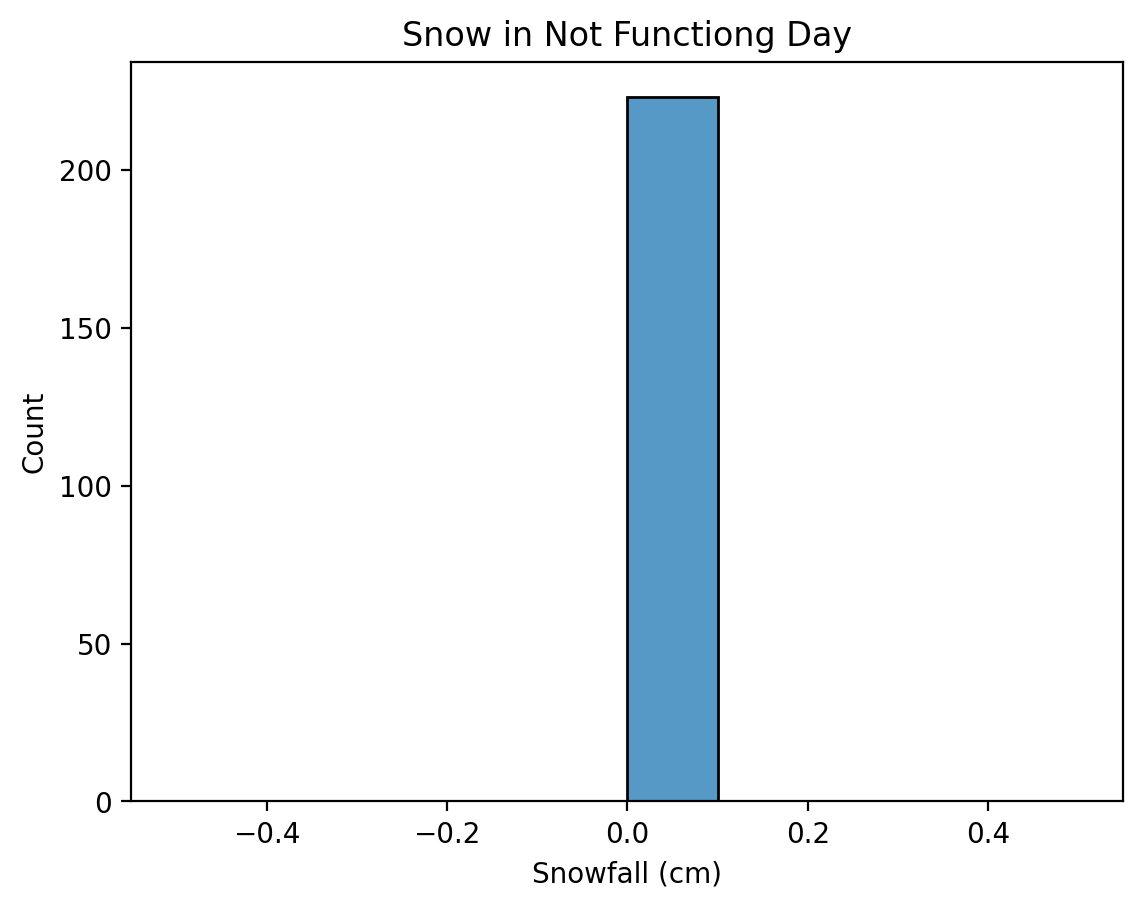

In [33]:
#가시성 확인해보기 
sns.histplot(df2['Visibility (10m)'])
plt.title('Visibility in Not Functioning Day')
plt.show()

# 강우량 확인해보기 
sns.histplot(df2['Rainfall(mm)'])
plt.title('Rain in Not Functiong Day')
plt.show()

# 풍속 확인해보기 
sns.histplot(df2['Wind speed (m/s)'])
plt.title('Wind in Not Functiong Day')
plt.show()

#강설량 확인해보기 
sns.histplot(df2['Snowfall (cm)'],bins=10)
plt.title('Snow in Not Functiong Day')
plt.show()

##### 기상상황으로 인한 운행정지가 아니거나 혹은 강우량과 강설량에 결측치가 있다고 추정됨 

## 예측 변수 : Rented Bike Count

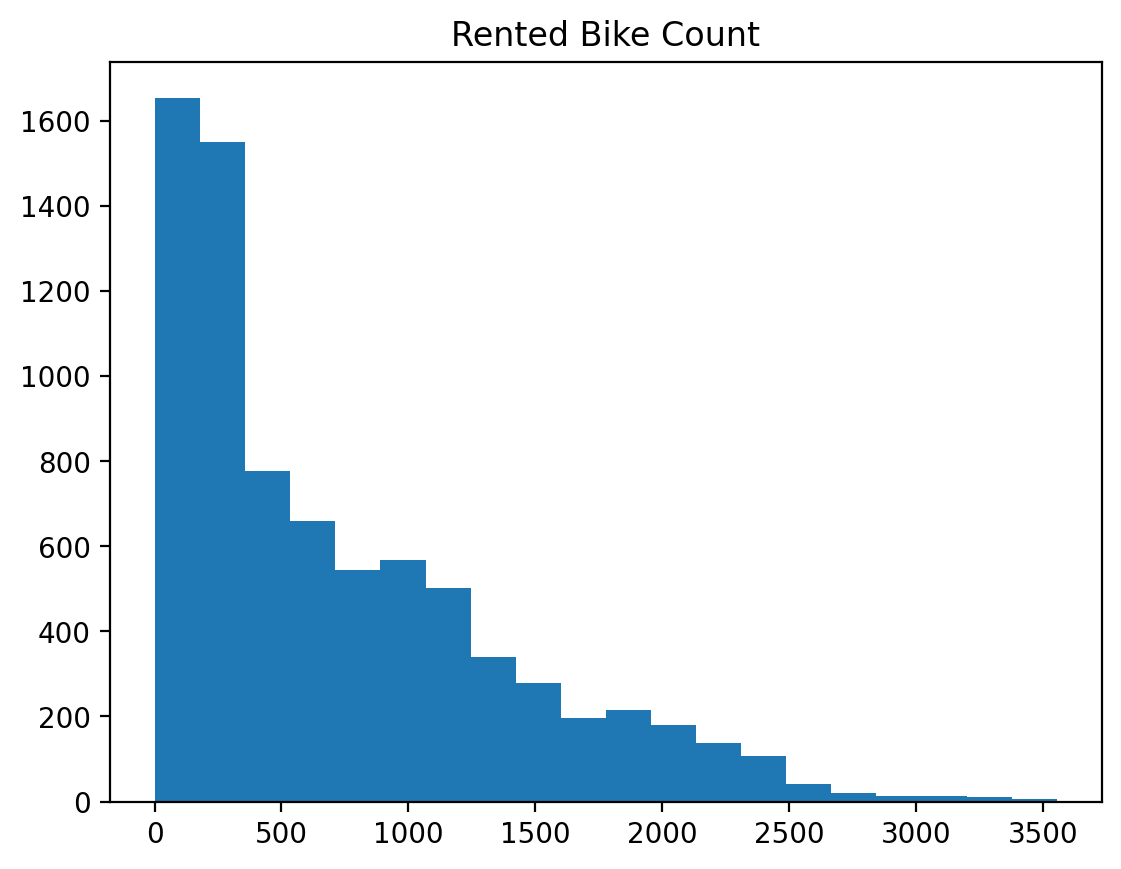

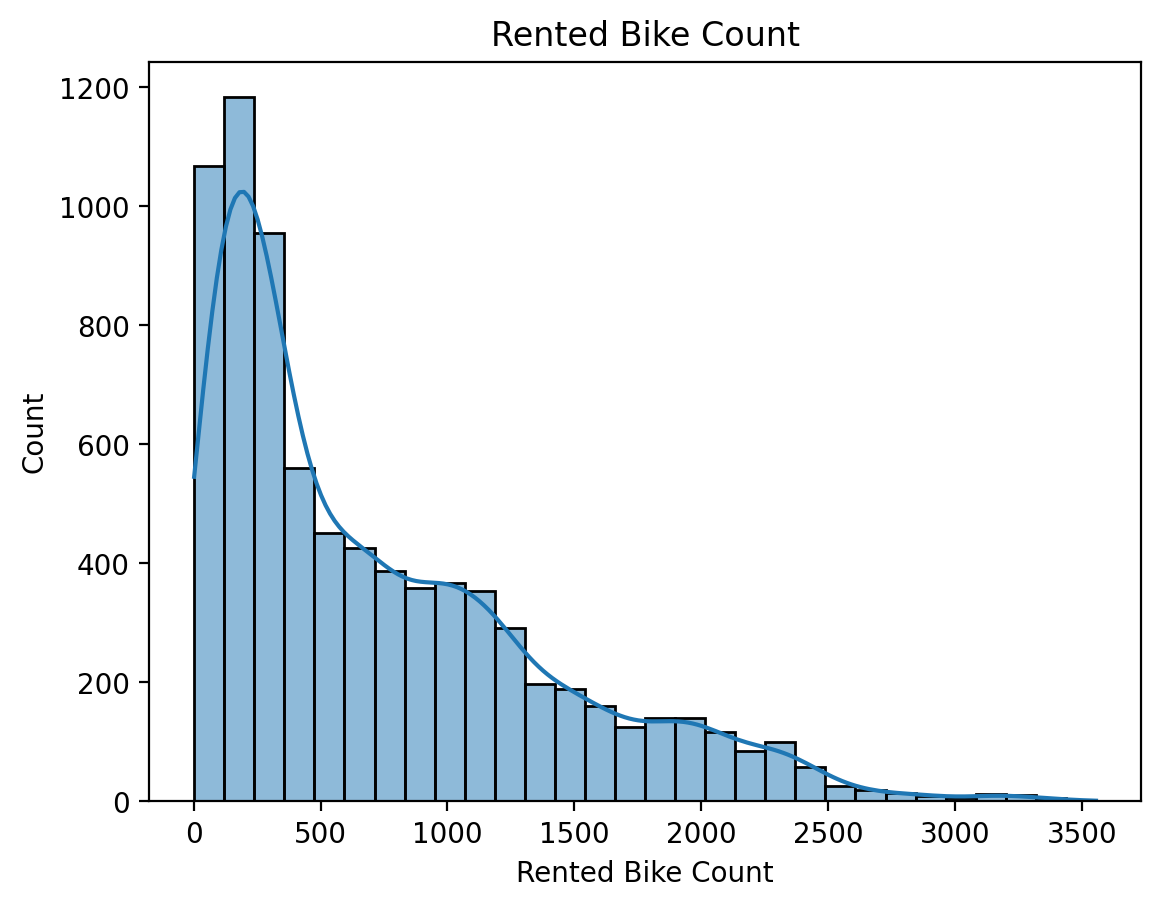

In [34]:
#히스토그램으로 나타내보기 
plt.hist(df3['Rented Bike Count'],bins=20)
plt.title('Rented Bike Count')
plt.show()

sns.histplot(df3['Rented Bike Count'],bins=30,kde=True)
plt.title('Rented Bike Count',fontsize=12)
plt.show()


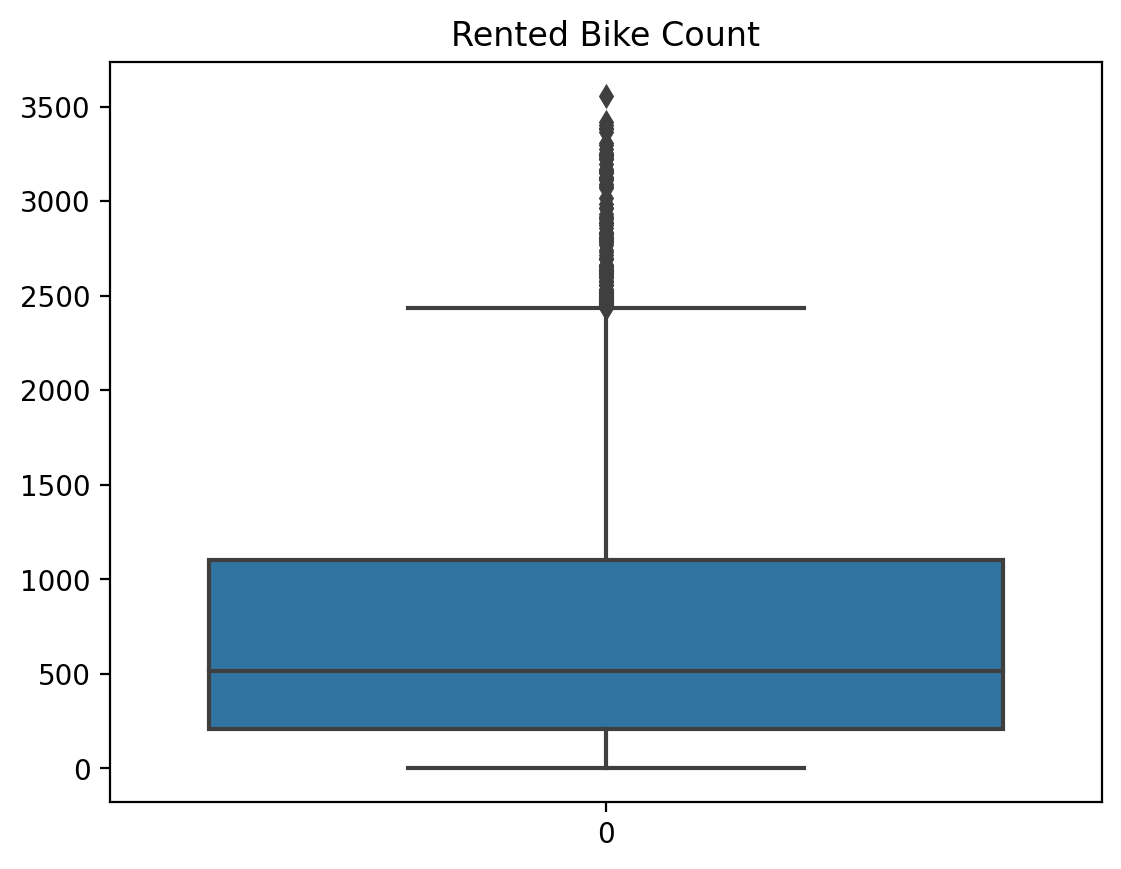

In [35]:
# 박스플롯(boxplot)으로 시각화
sns.boxplot(df3['Rented Bike Count'])
plt.title('Rented Bike Count')
plt.show()


#### 3500대는 나올수 있는 값이라 생각하므로 이상치로 처리하지 않기 

## 온도 변수
##### 가설: 온도가 높을 수록 따릉이 대여량은 증가할 것이다 ( 상관계수가 0.54 )

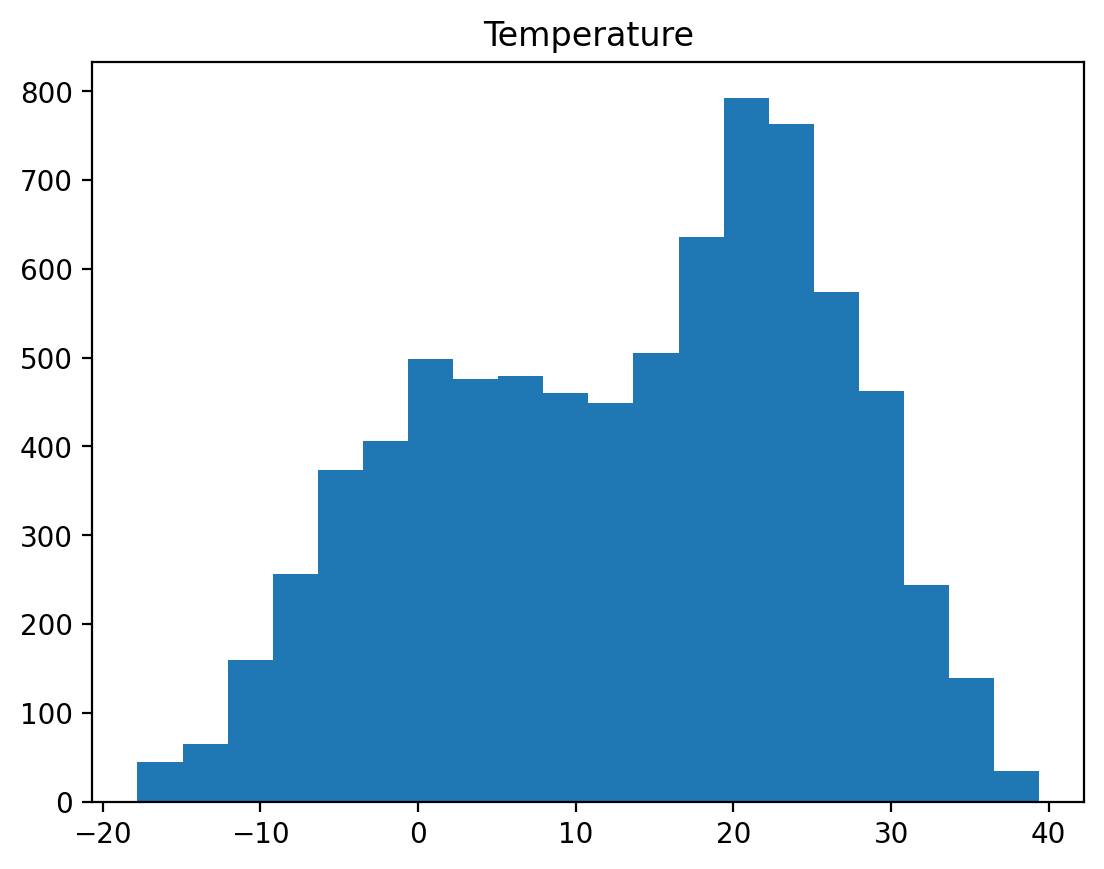

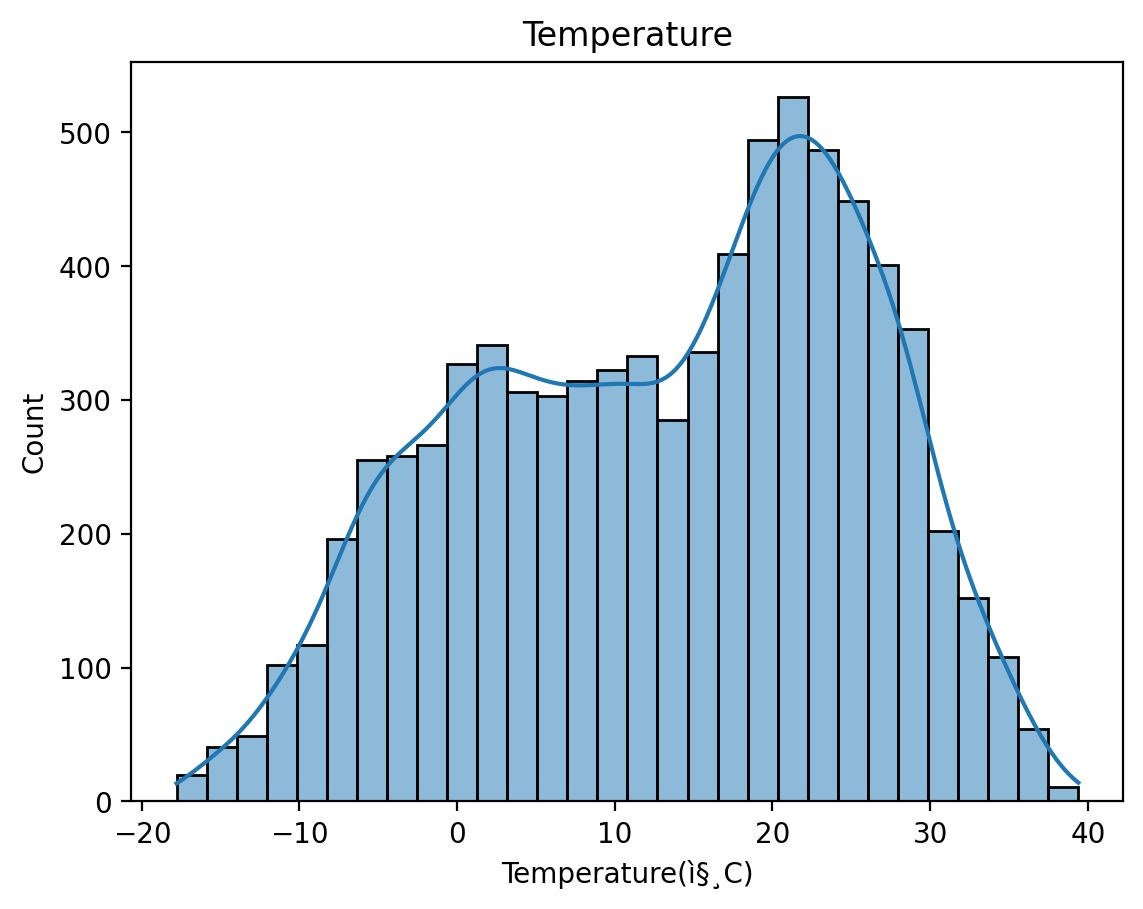

In [37]:
#온도 변수의 히스토그램을 통해서 살펴보기 
plt.hist(df3['Temperature(ì§¸C)'],bins=20)
plt.title('Temperature')
plt.show()
#
sns.histplot(df3['Temperature(ì§¸C)'], bins=30 ,kde=True )
plt.title('Temperature')
plt.show()

##### 온도가 10-20 사이에 가장 많이 있고 그 아래나 그 위는 개수가 적은 것을 알 수 있다.

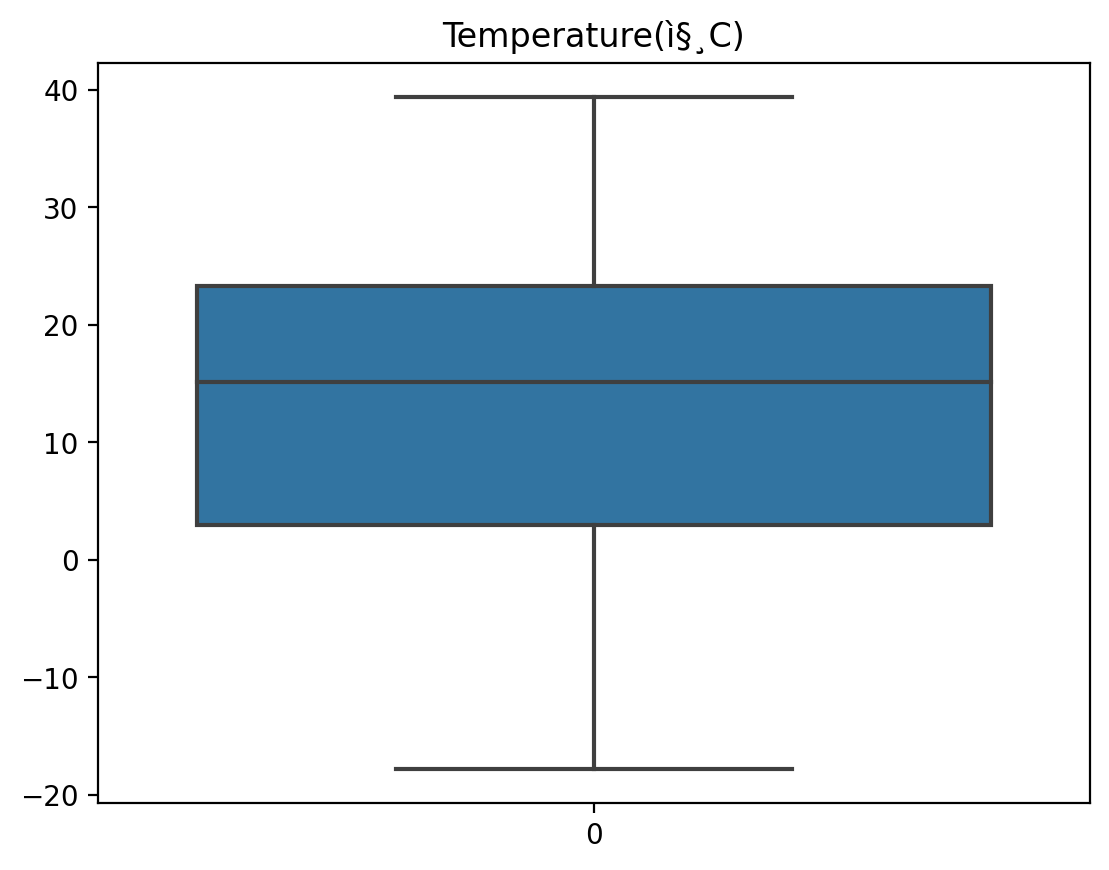

In [39]:
#박스플롯으로 알아보기 
sns.boxplot(df3['Temperature(ì§¸C)'])
plt.title('Temperature(ì§¸C)')
plt.show()

Good    3563
Hot     2860
Cold    1394
Name: tempcat, dtype: int64


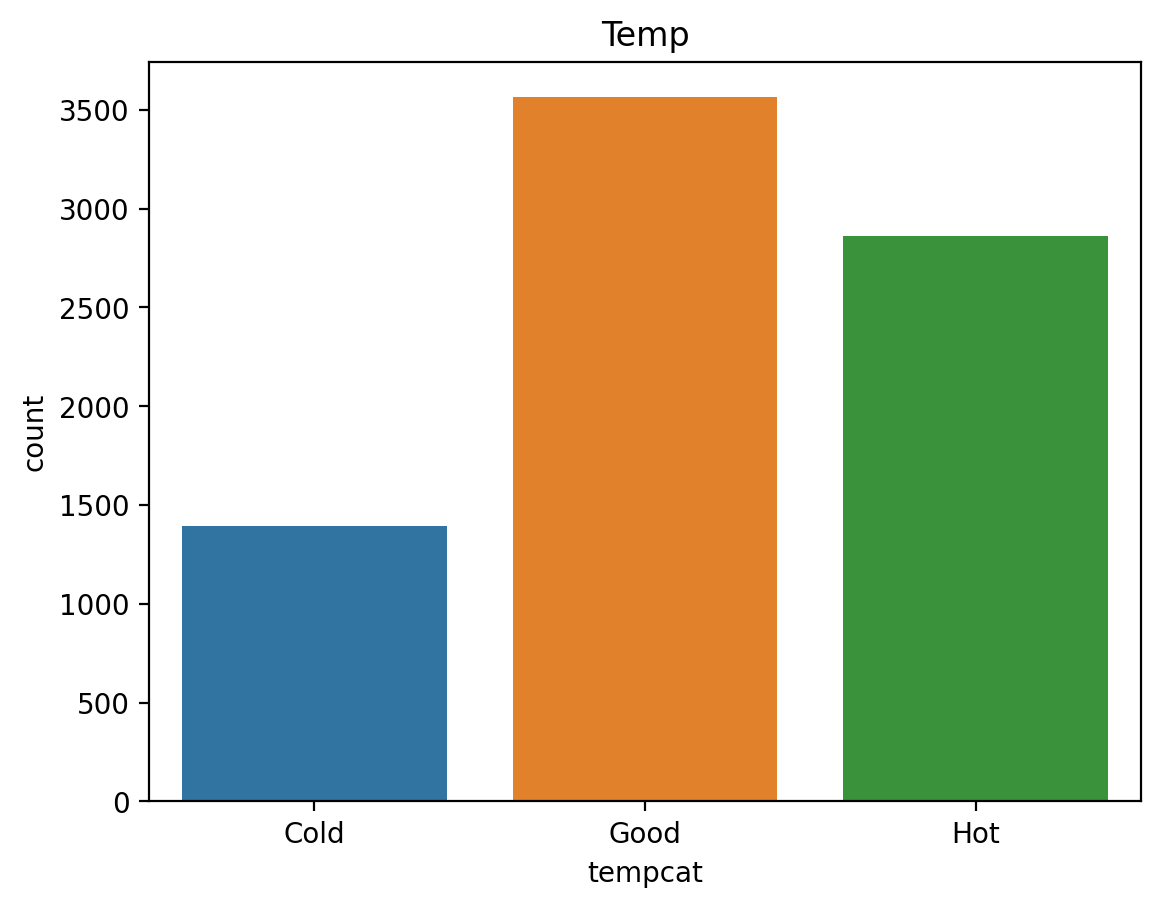

In [41]:
#온도대에 따른 따릉이 대여량의 박스플롯 그리기 


#데이터프레임 카피하기 
df4=df3.copy()
#온도대 나누기 
category=['Cold','Good','Hot'] # 온도대 나눌 카테고리 설정하기 
hourcat=pd.cut(x=df4['Temperature(ì§¸C)'],bins=[-20,0,20,40],labels=category, right=False) #시간대 나누기 
df4['tempcat']=hourcat #데이터 프레임에 새로운 열 생성하기 

#각 온도대 별 개수 
print(df4['tempcat'].value_counts()) 
sns.countplot(x=df4['tempcat'])
plt.title('Temp')
plt.show()

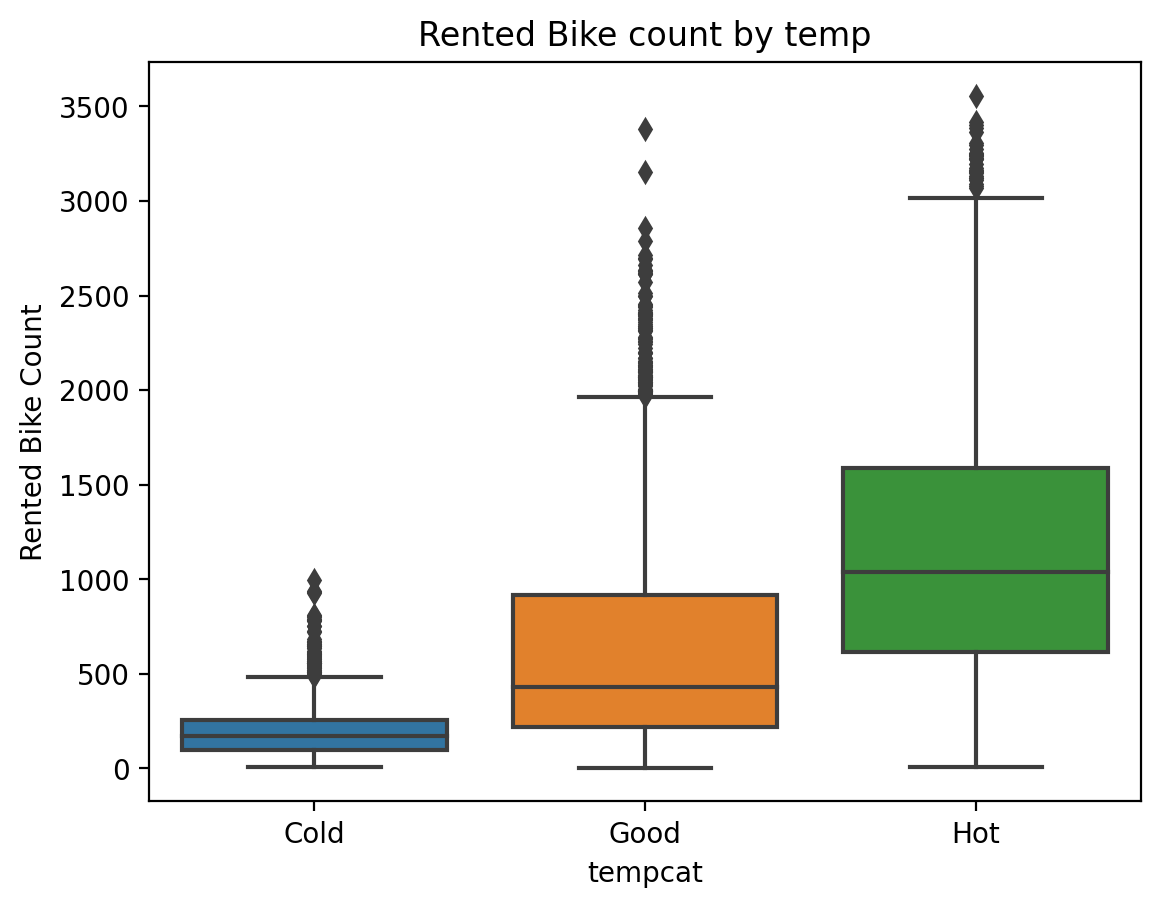

In [42]:
#온도대에 따른 따릉이 대여량 박스플롯 그리기 
sns.boxplot(x=df4['tempcat'], y=df4['Rented Bike Count'])
plt.title('Rented Bike count by temp')
plt.show()

##### 따릉이 대여량은 추울때 가장 적고 날씨가 더울 때 가장 많은 것을 확인할 수 있다

## 습도 변수
##### 습도 변수와 이슬점 온도 사이의 상관관계

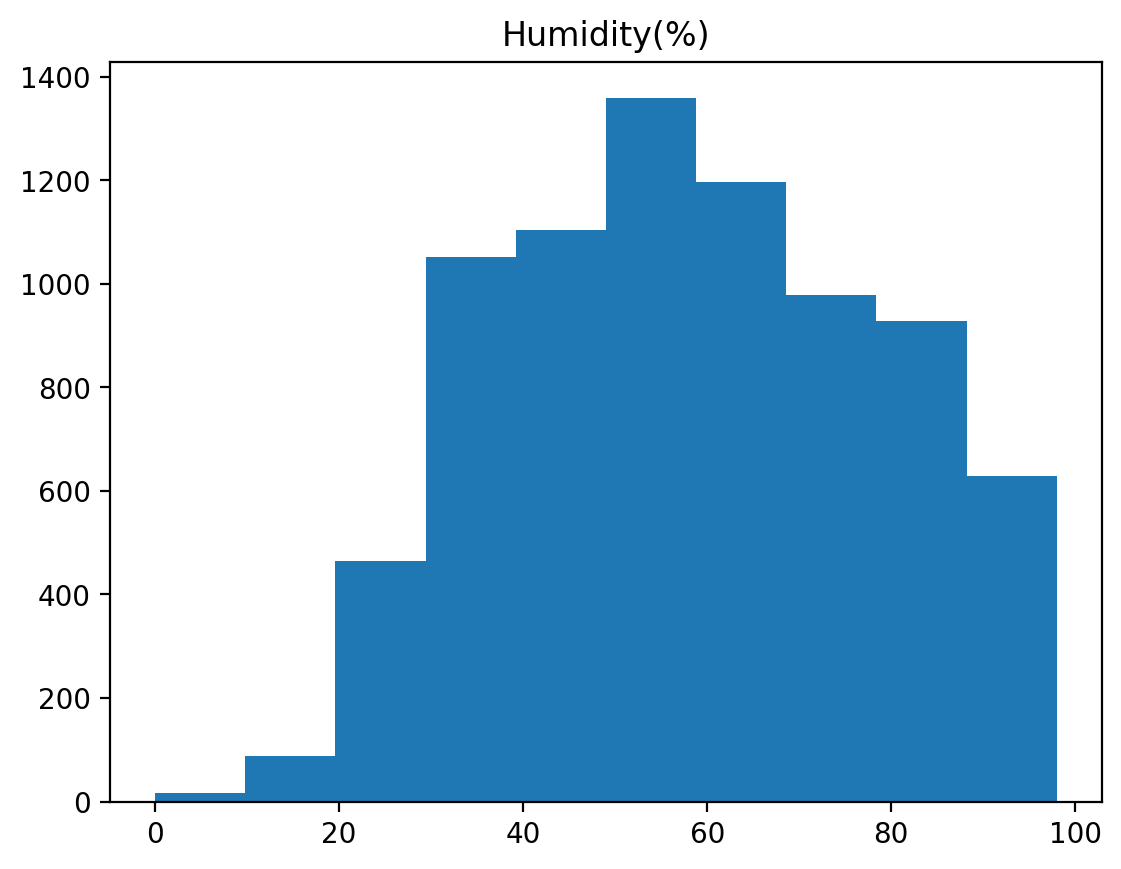

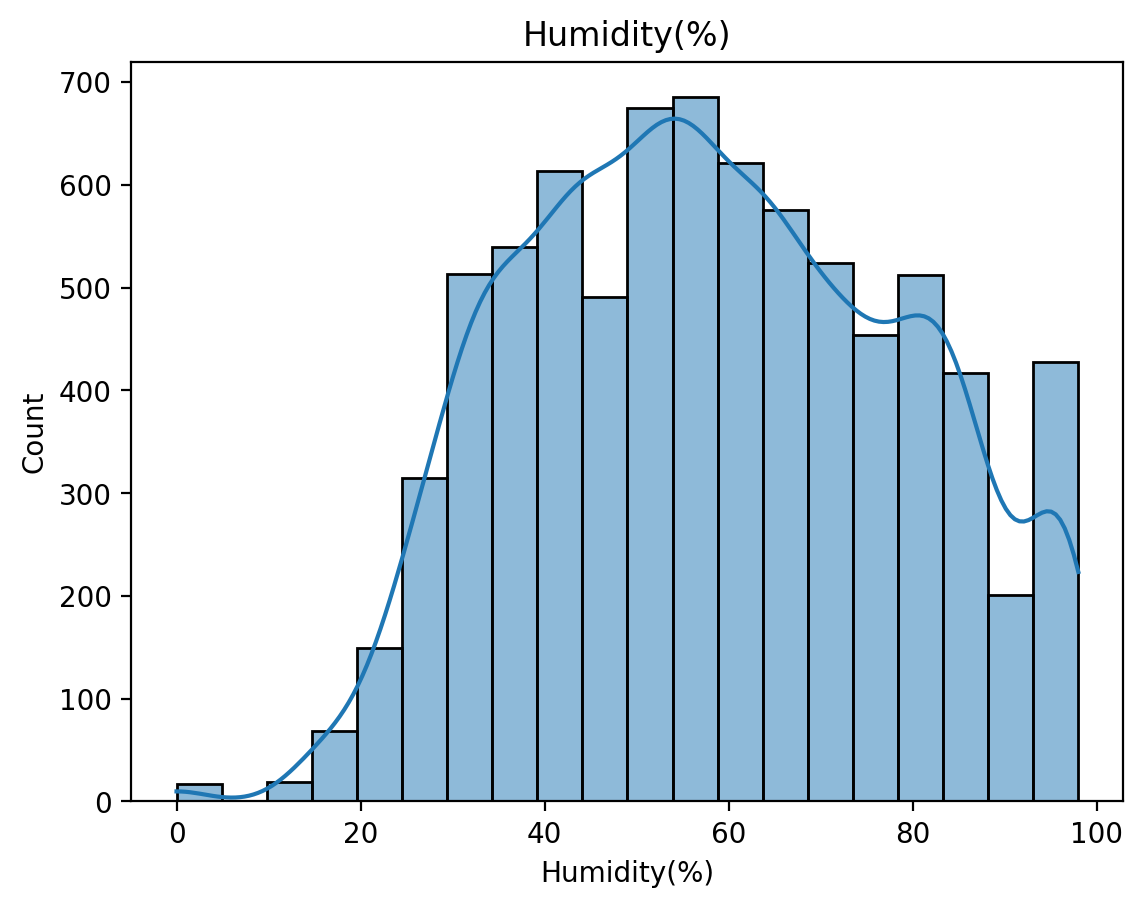

In [44]:
# 습도 변수 히스토그램으로 나타내기 
plt.hist(df3['Humidity(%)'])
plt.title('Humidity(%)')
plt.show()

sns.histplot(df3['Humidity(%)'], kde=True , bins=20)
plt.title('Humidity(%)')
plt.show()

Text(0.5, 1.0, 'Humidity(%)')

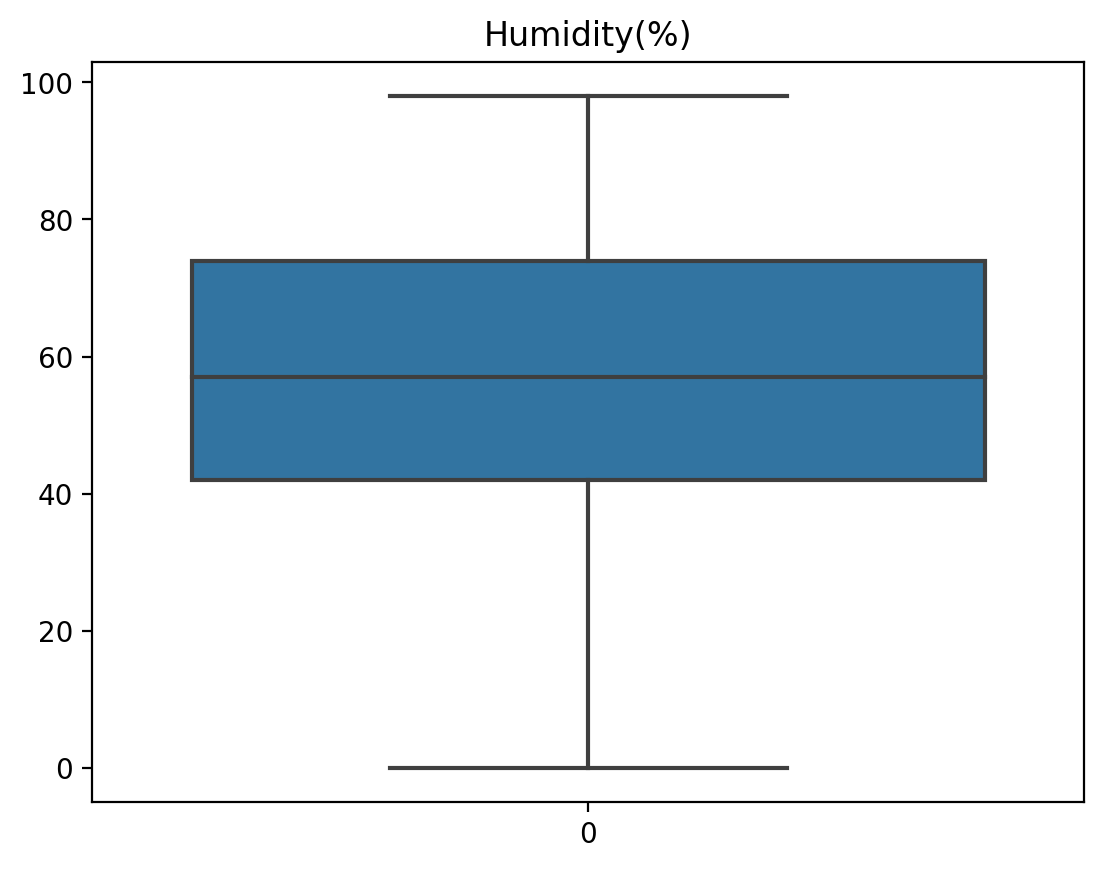

In [45]:
#습도변수를 박스플롯으로 나타내보기 
sns.boxplot(df3['Humidity(%)'])
plt.title('Humidity(%)')

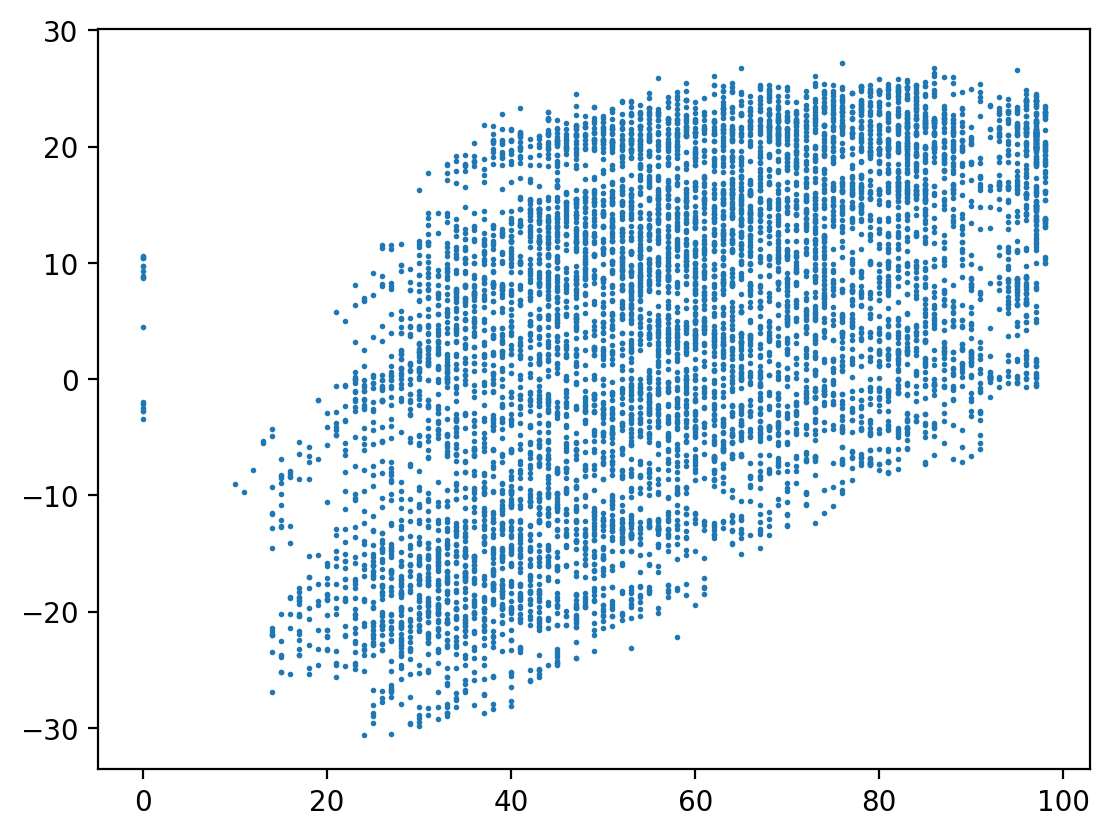

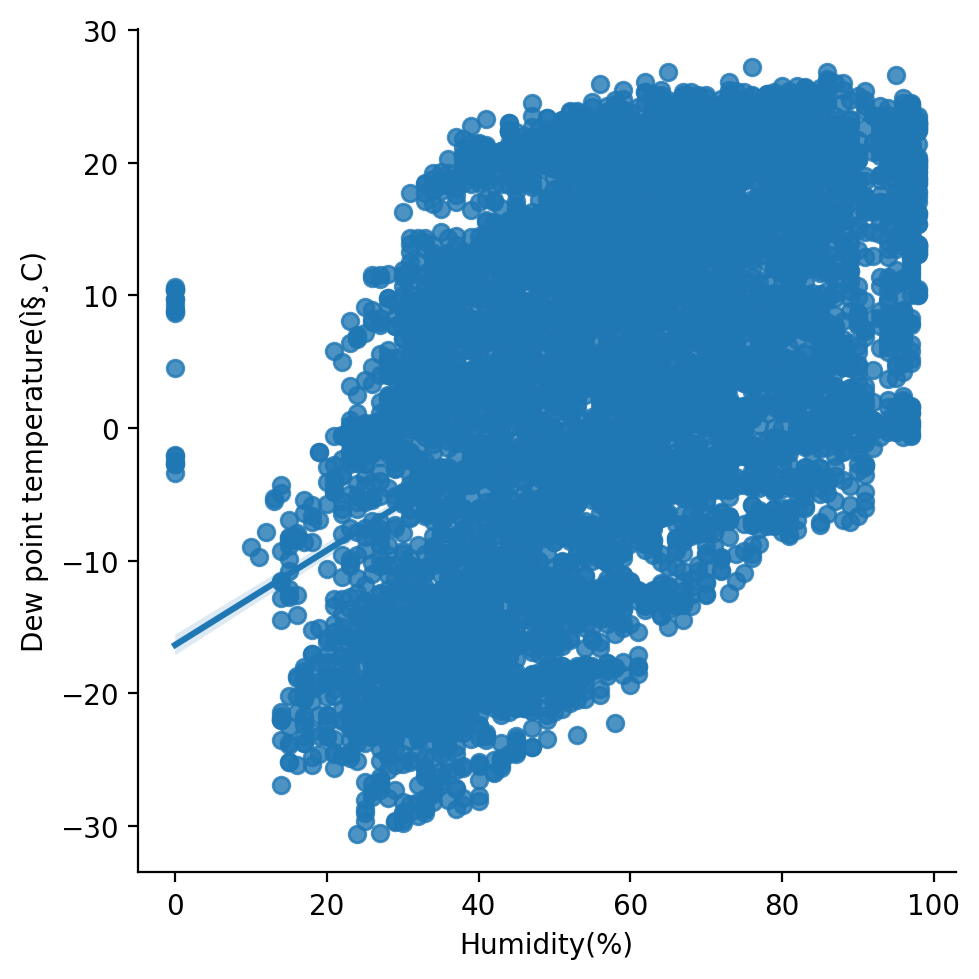

In [47]:
#습도변수와 이슬점 온도와의 상관관계가 0.54 이므로 양의 상관관계가 있을 것으로 추정됨

# 습도변수와 이슬점 온도와의 상관관계 구해보기 - 산점도 그리기 
plt.scatter(df3['Humidity(%)'],df3['Dew point temperature(ì§¸C)'],s=1)
plt.show()

# 회귀직선 그려보기 
sns.lmplot(x='Humidity(%)',y='Dew point temperature(ì§¸C)',data=df3)
plt.show()

## 가시성 변수

###### 눈으로 볼 수 있는 거리 , 날씨가 좋은 날은 가시 거리가 길다, 날씨가 안 좋은 날은 가시 거리가 짧다 

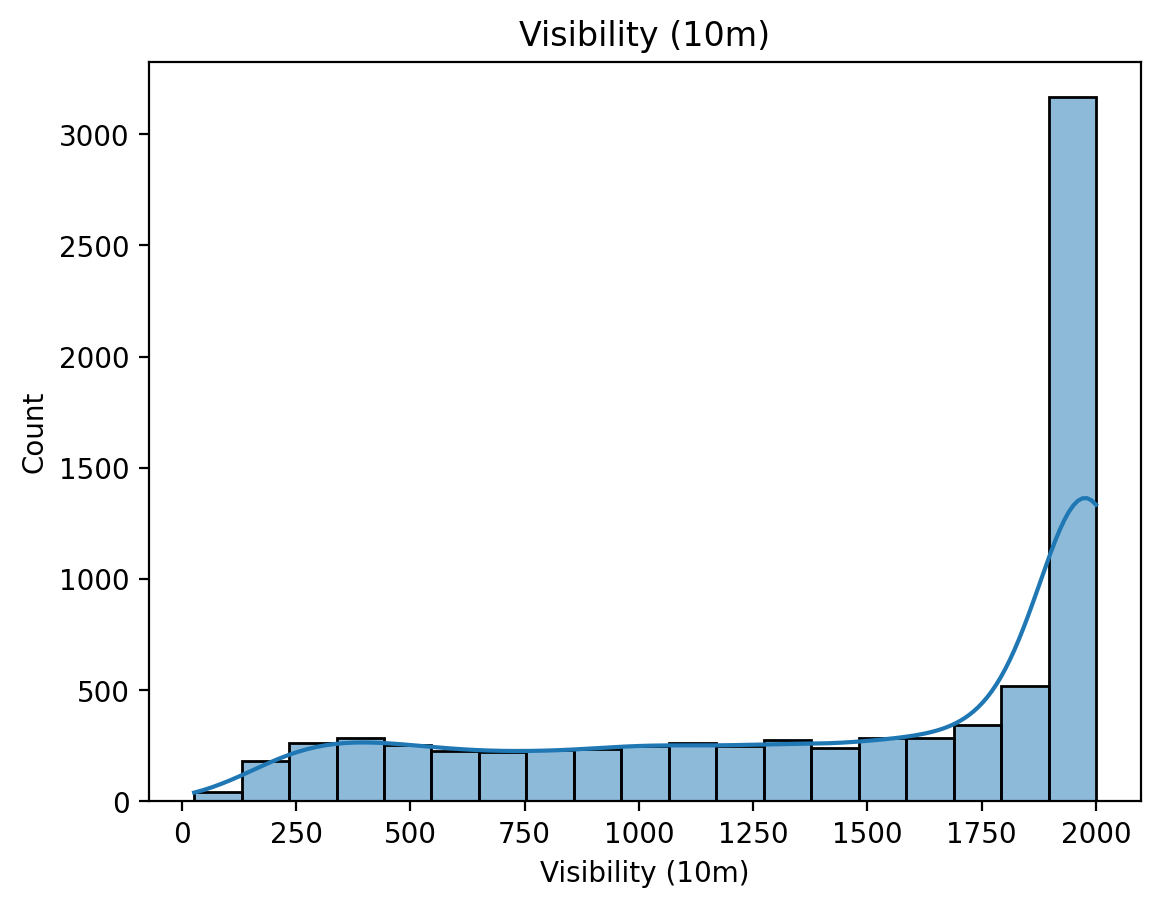

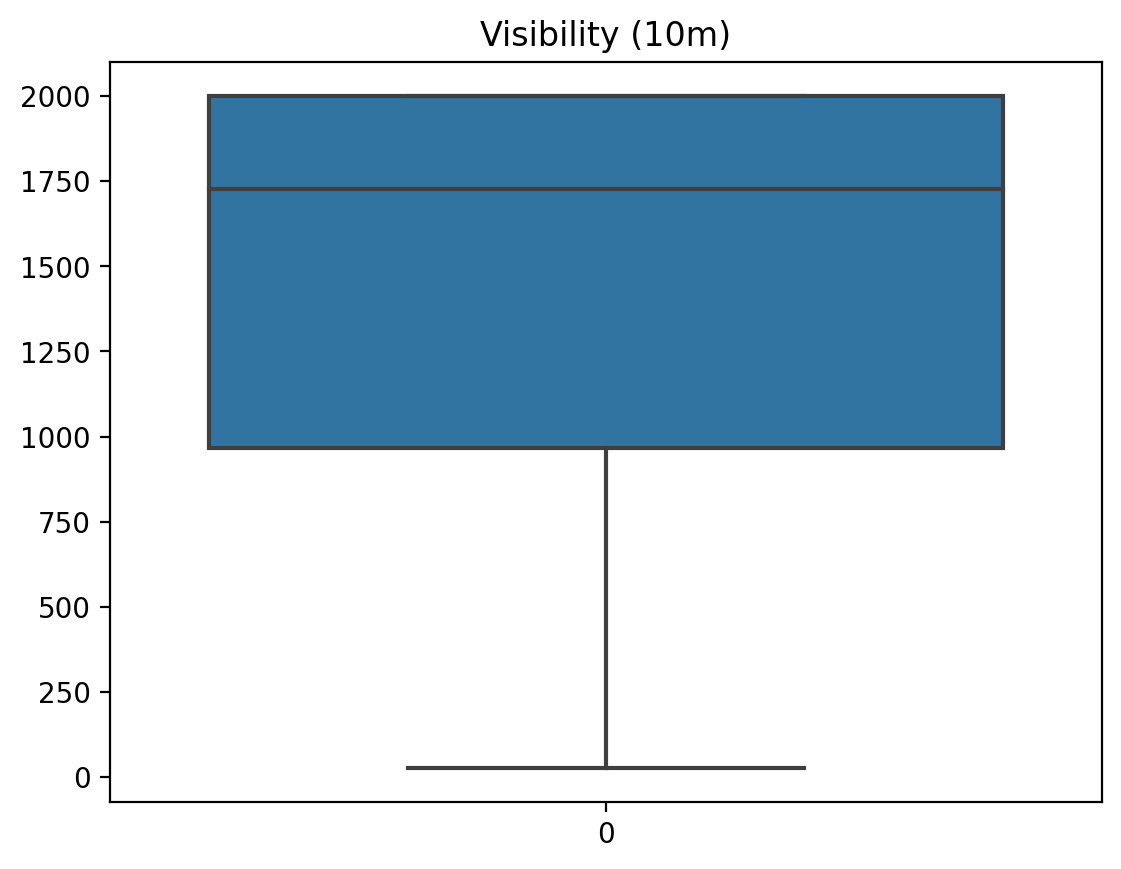

In [48]:
#가시성 변수-히스토그램 
sns.histplot(df3['Visibility (10m)'],kde=True)
plt.title('Visibility (10m)')
plt.show()

#가시성 변수- 박스플롯
sns.boxplot(df3['Visibility (10m)'])
plt.title('Visibility (10m)')
plt.show()


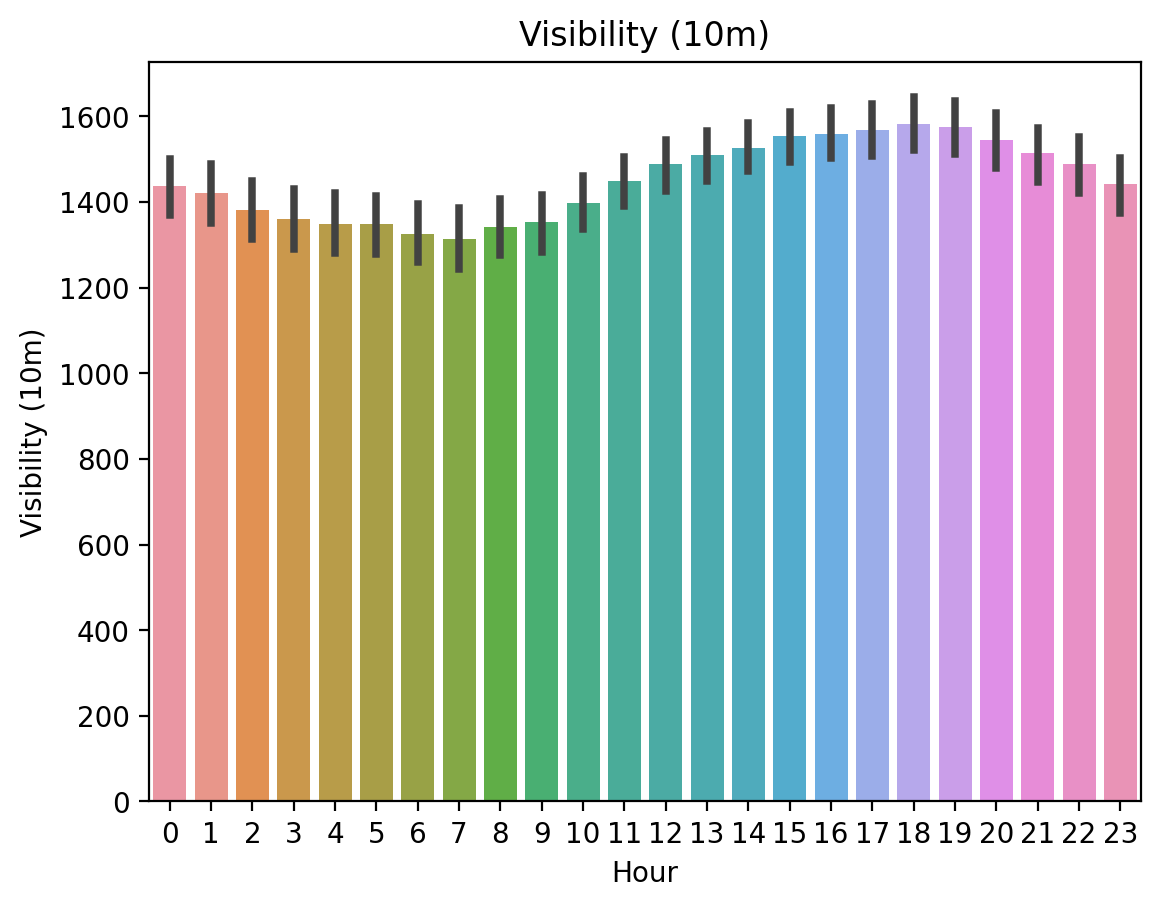

In [196]:
#시간대별 태양복사에너지 확인하기

#시간대별로 그룹바이하기 
df3.groupby('Hour')['Visibility (10m)'].mean().reset_index()

#시각화 
sns.barplot(x='Hour',y='Visibility (10m)',data=df3)
plt.title('Visibility (10m)')
plt.show()

##### 2000 쯤에 치우쳐져있는 것을 알 수 있다.

## 풍속 변수 
##### 0-7 m/s 의 풍속일 경우 안전 
##### 7-10 m/s의 풍속일 경우 주의 
##### 10-15 m/s 의 풍속일 경우 경고 ( 다소 강한 바람) 

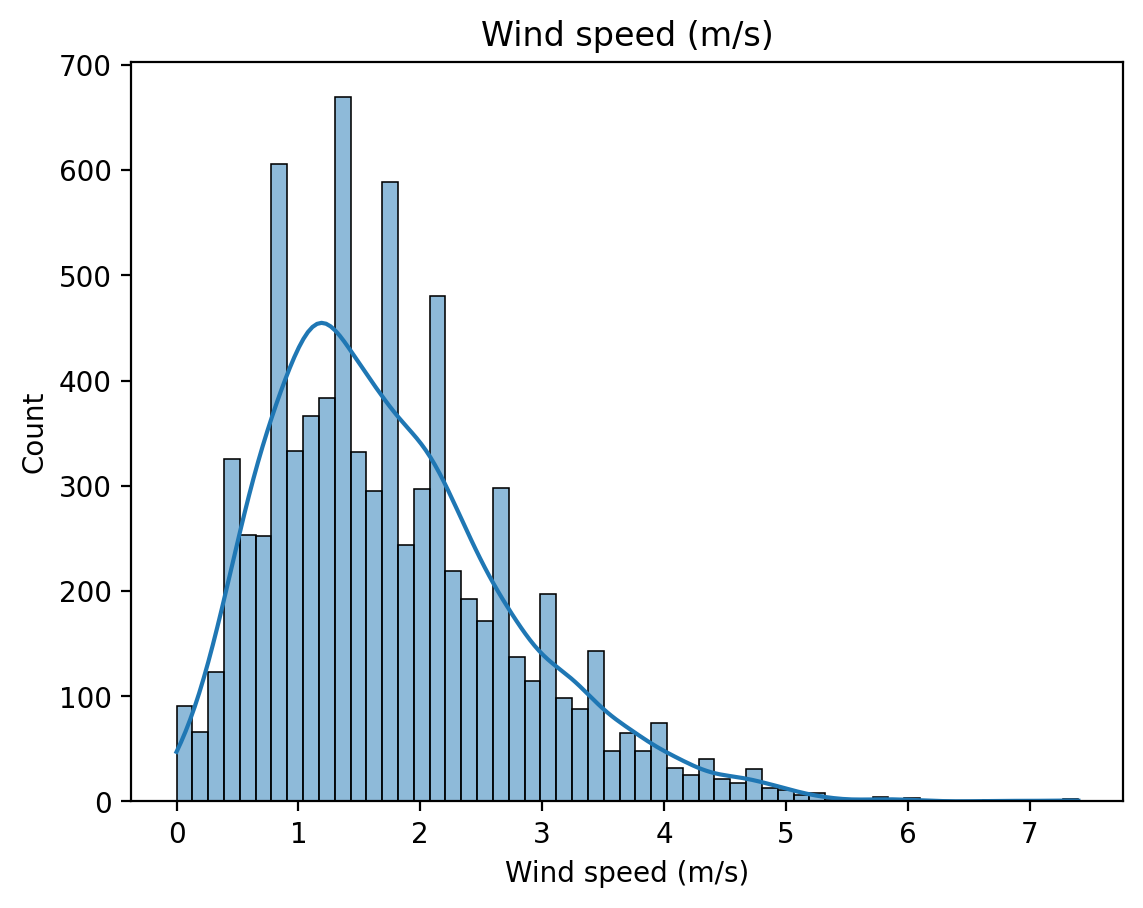

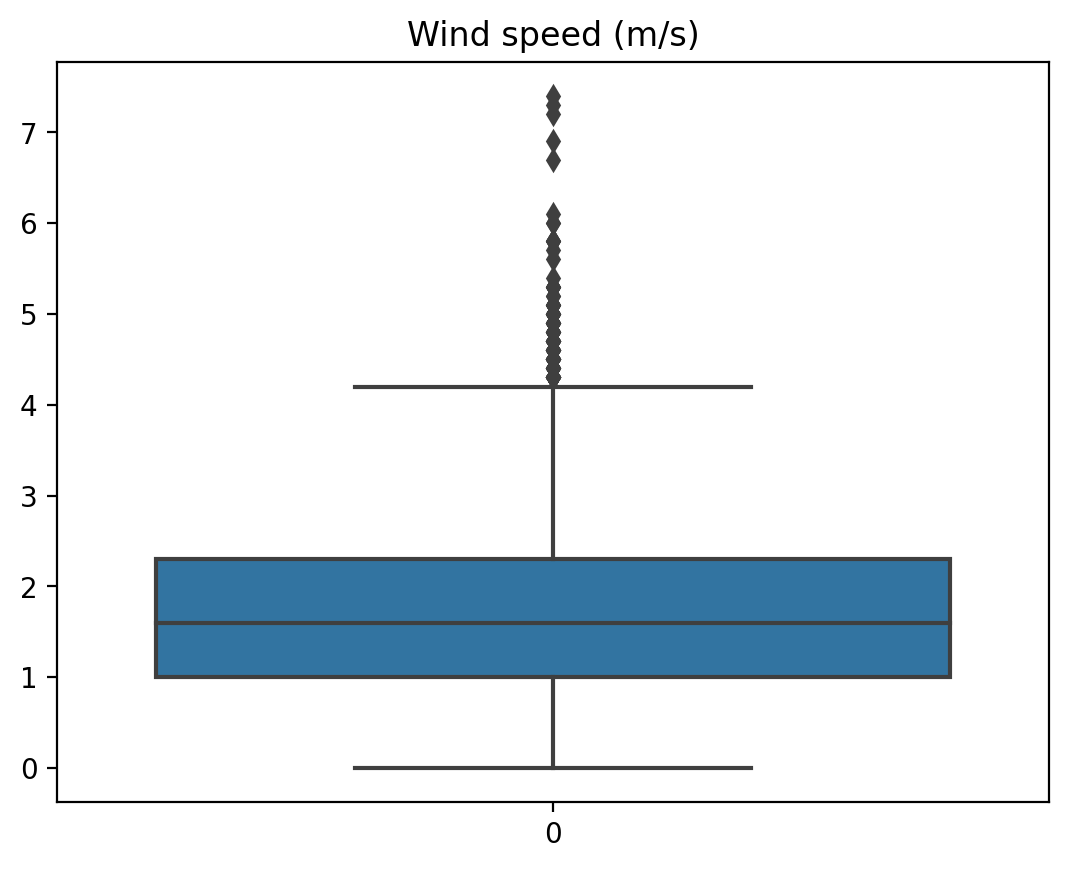

In [49]:
#풍속 변수-히스토그램 
sns.histplot(df3['Wind speed (m/s)'],kde=True)
plt.title('Wind speed (m/s)')
plt.show()

#풍속 변수- 박스플롯
sns.boxplot(df3['Wind speed (m/s)'])
plt.title('Wind speed (m/s)')
plt.show()

##### 풍속 변수의 경우 10m/s 가 넘는 경우가 없으므로 해당 기간 동안 강한 바람이 불었던 적은 없다고 볼 수 있다
##### 또한 박스플롯에서 정의하는 이상치는 실제로 나올 수 있는 값이므로 따로 이상치 처리를 하지 않았다

## 태양복사에너지 변수 

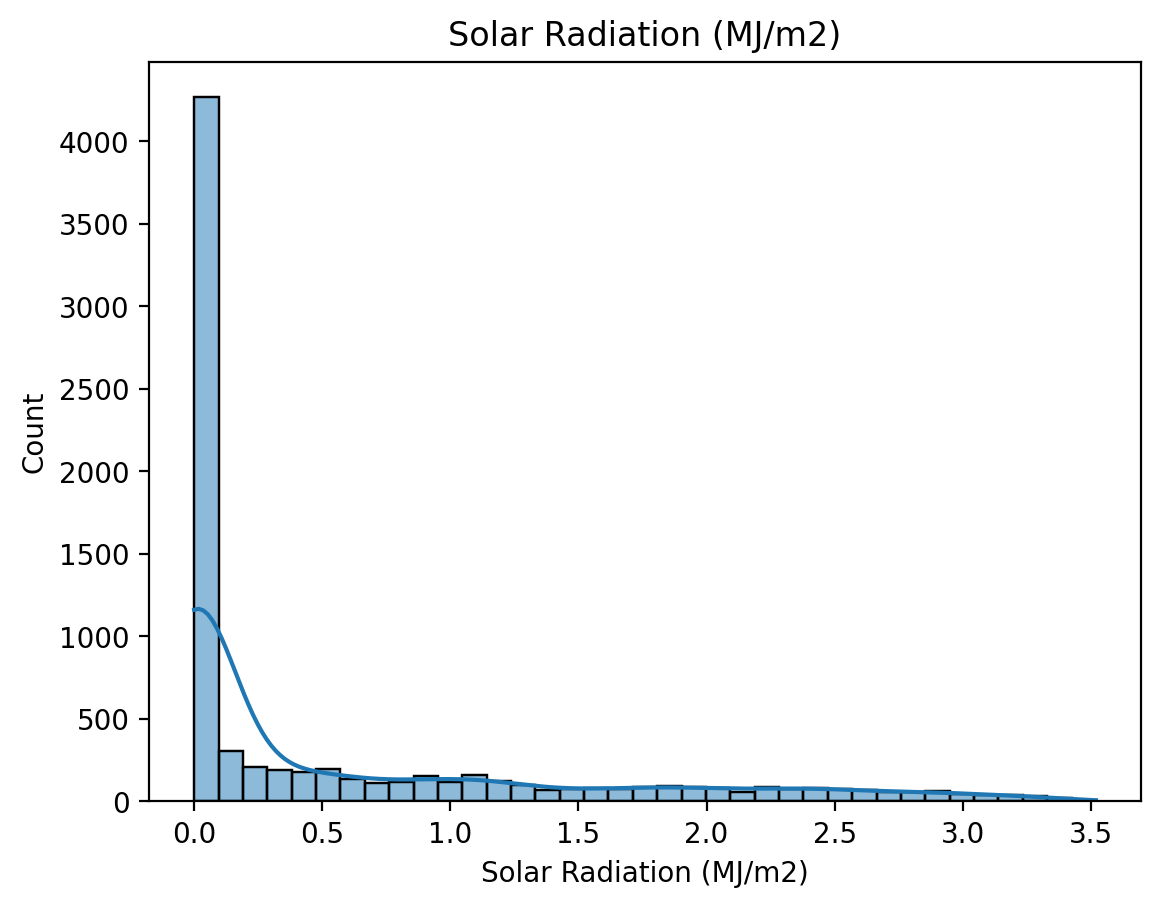

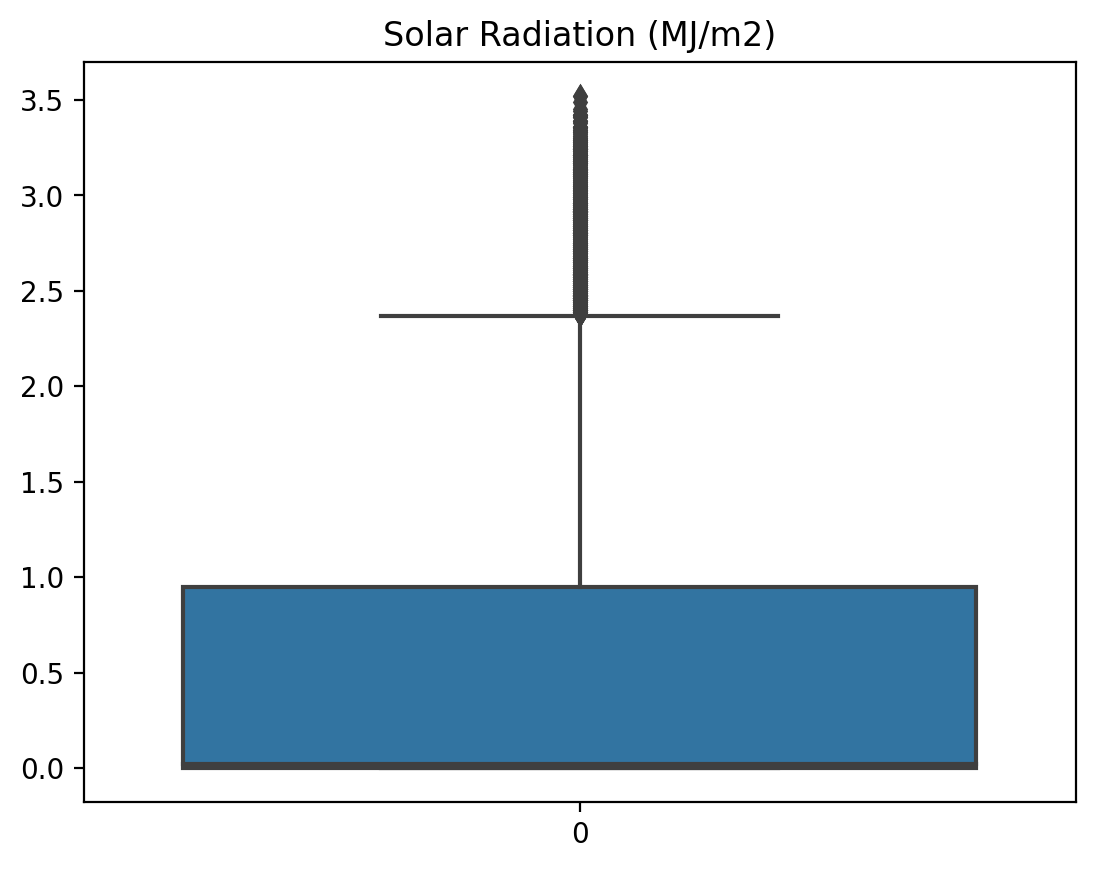

In [50]:
#태양복사에너지-히스토그램 
sns.histplot(df3['Solar Radiation (MJ/m2)'],kde=True)
plt.title('Solar Radiation (MJ/m2)')
plt.show()

#태양복사에너지- 박스플롯
sns.boxplot(df3['Solar Radiation (MJ/m2)'])
plt.title('Solar Radiation (MJ/m2)')
plt.show()

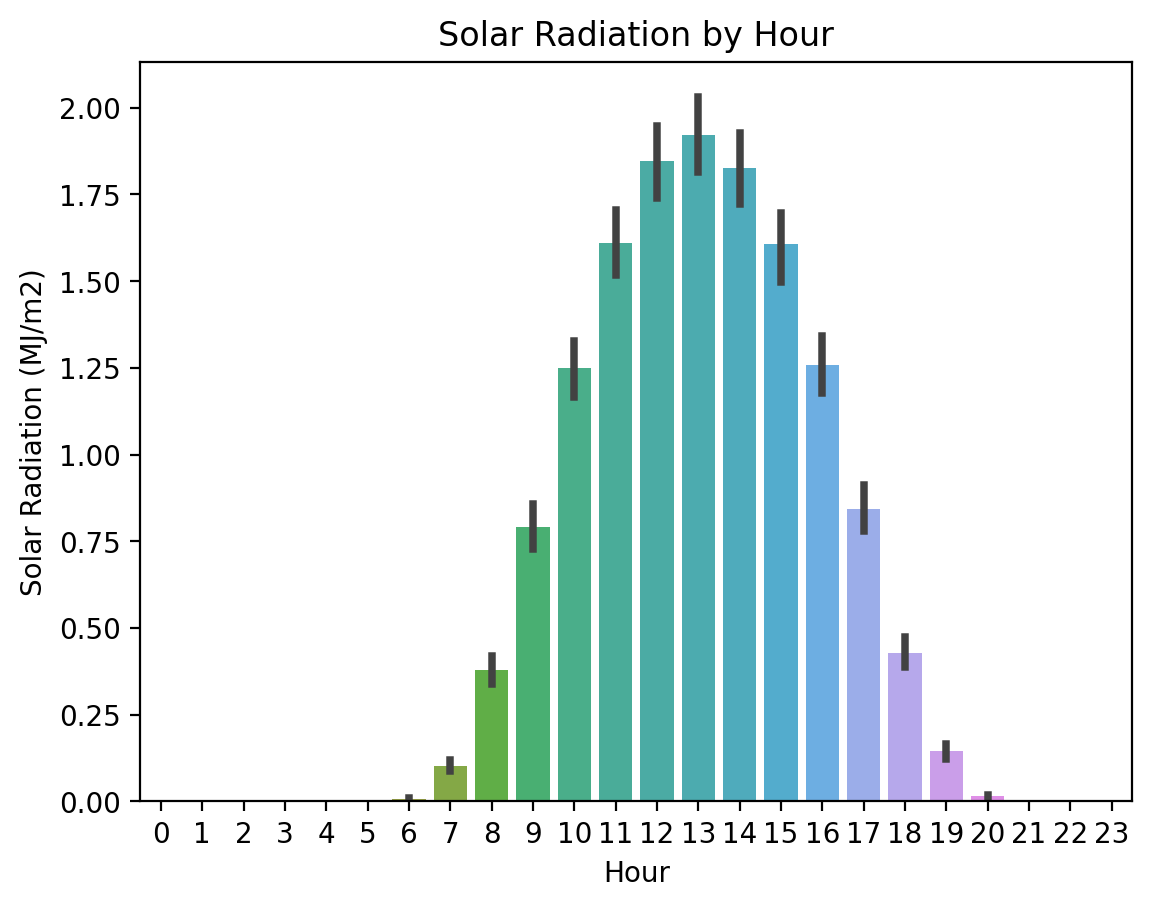

In [178]:
#시간대별 태양복사에너지 확인하기

#시간대별로 그룹바이하기 
df3.groupby('Hour')['Solar Radiation (MJ/m2)'].mean().reset_index()

#시각화 
sns.barplot(x='Hour',y='Solar Radiation (MJ/m2)',data=df3)
plt.title('Solar Radiation by Hour')
plt.show()


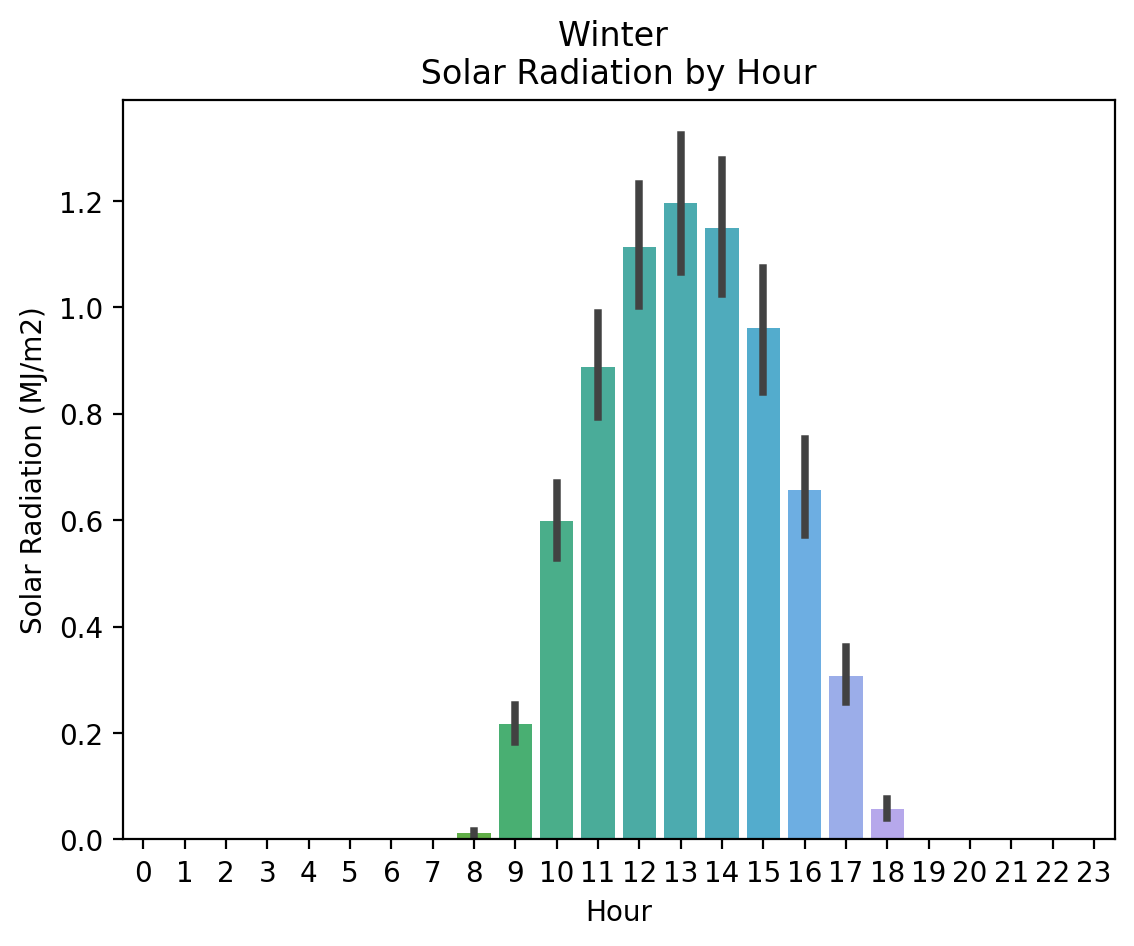

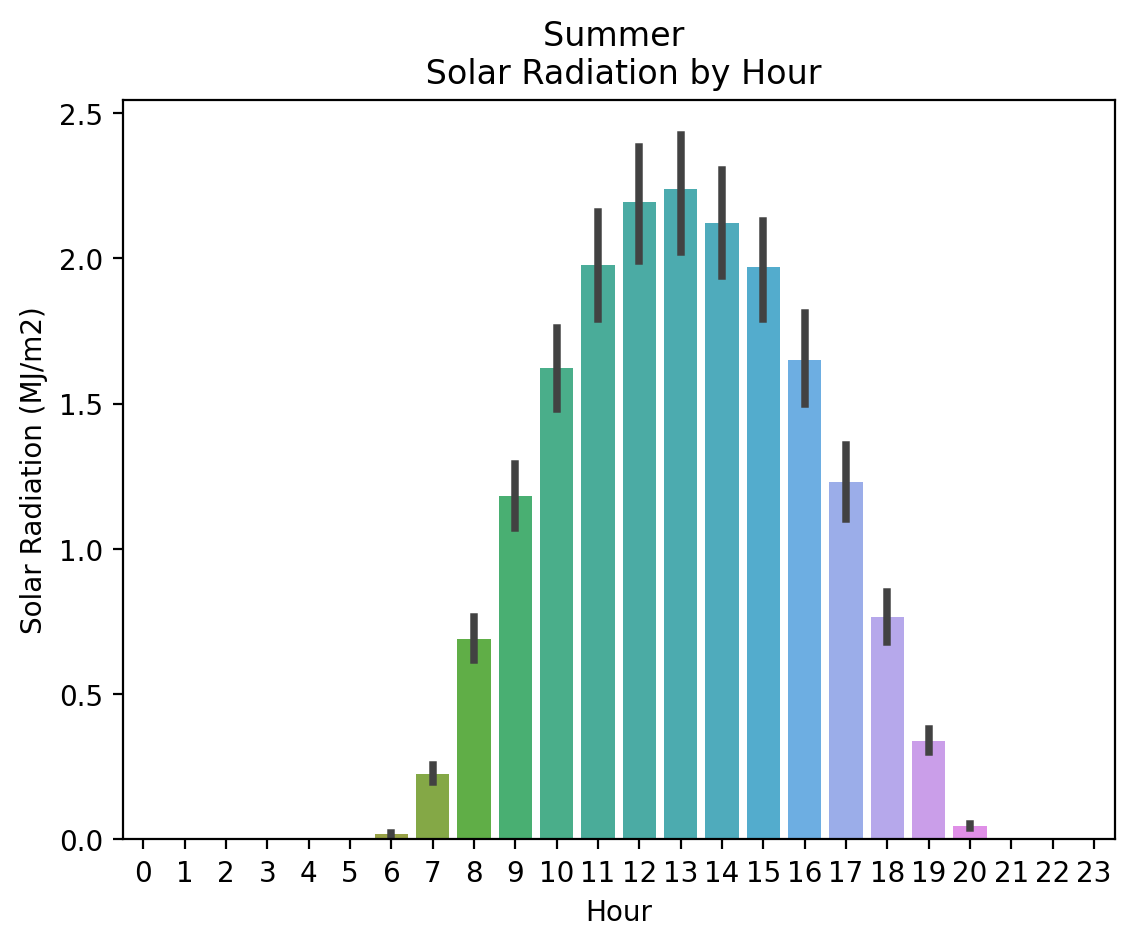

In [185]:
#계절 별로 나눠서 확인해보기 - 겨울과 여름으로 나눠서 비교해보기 

#로 groupby 하기 
selected_Winter = df3[df3['Seasons'].isin(['Winter'])]
selected_Summer = df3[df3['Seasons'].isin(['Summer'])]

#시간대별로 그룹바이하기 
selected_Winter.groupby('Hour')['Solar Radiation (MJ/m2)'].mean().reset_index()
selected_Summer.groupby('Hour')['Solar Radiation (MJ/m2)'].mean().reset_index()

#시각화 
sns.barplot(x='Hour',y='Solar Radiation (MJ/m2)',data=selected_Winter)
plt.title('Winter \n Solar Radiation by Hour ')
plt.show()

#시각화 
sns.barplot(x='Hour',y='Solar Radiation (MJ/m2)',data=selected_Summer)
plt.title('Summer \n Solar Radiation by Hour')
plt.show()



In [195]:
#전체 데이터에서 하루 종일 태양복사에너지량이 0이 아닌 경우 
result = df.groupby('Date')['Solar Radiation (MJ/m2)'].apply(lambda x: (x == 0).any())
print(f"태양복사에너지량이 유의미한 행:{result.sum()}")

태양복사에너지량이 유의미한 행:335


##### 0이 너무 많아서 결측값인 줄 알았으나 시간대별로 보았을때 태양이 없는 시간에만 0이 찍히는 것이므로 결측값이 아니라고 생각함 

##### 또한 하루종일 태양 복사에너지량이 0인 경우는 없다 

## 강우량 변수 

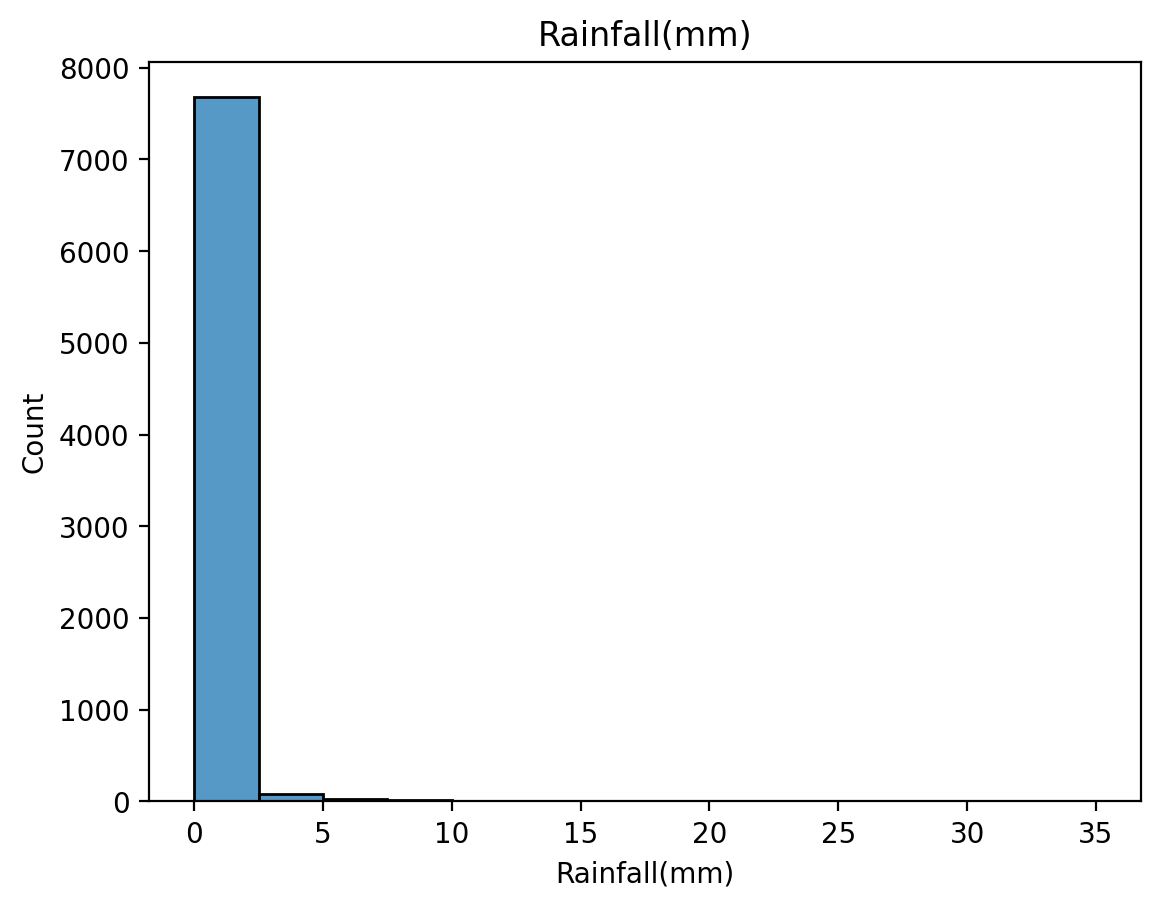

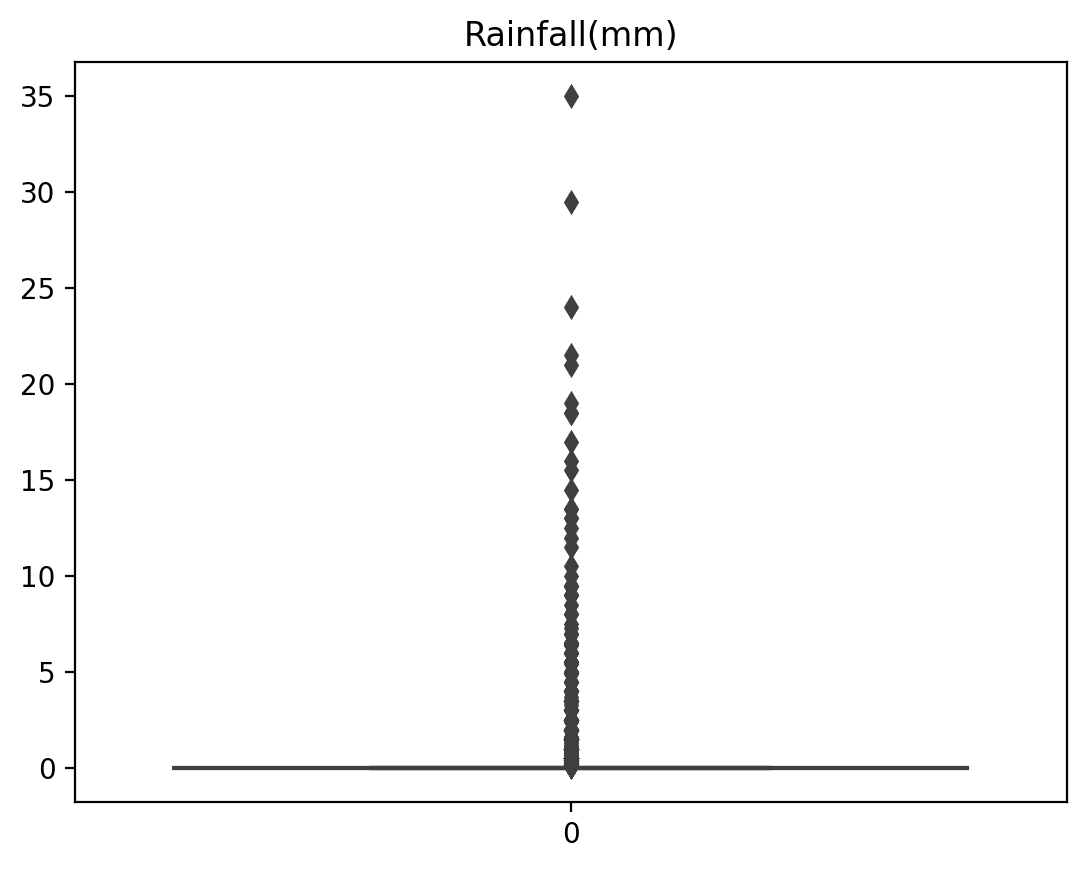

In [53]:
#강우량 변수-히스토그램 
sns.histplot(df3['Rainfall(mm)'])
plt.title('Rainfall(mm)')
plt.show()

#강우량 변수- 박스플롯
sns.boxplot(df3['Rainfall(mm)'])
plt.title('Rainfall(mm)')
plt.show()

#### 이 경우 0 값이 대체적이고 나머지 값들이 존재한다 35mm 는 말이 안되는 값이 아니므로 가능한 값이다 따라서 이상치 처리를 하지 않는다 

In [59]:
#따릉이 운영하는 날 중 비가 온날들
df3[df3['Rainfall(mm)']>0]

,Date,Rented Bike Count,Hour,Temperature(ì§¸C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(ì§¸C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,Day_of_Week,SR_log
51,2017-12-03,117,3,3.4,71,1.6,1011,-1.3,0.00,0.5,0.0,Winter,No Holiday,Yes,12,Sunday,0.000000
54,2017-12-03,13,6,3.4,86,2.5,278,1.2,0.00,1.0,0.0,Winter,No Holiday,Yes,12,Sunday,0.000000
57,2017-12-03,152,9,3.5,91,1.8,231,2.1,0.02,2.5,0.0,Winter,No Holiday,Yes,12,Sunday,0.019803
78,2017-12-04,200,6,1.2,76,3.7,371,-2.5,0.00,0.1,0.0,Winter,No Holiday,Yes,12,Monday,0.000000
120,2017-12-06,145,0,-2.8,77,0.0,331,-6.2,0.00,0.1,0.1,Winter,No Holiday,Yes,12,Wednesday,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7910,2018-10-26,147,14,17.7,95,1.9,255,11.9,0.09,5.5,0.0,Autumn,No Holiday,Yes,10,Friday,0.086178
7911,2018-10-26,576,15,14.0,87,1.6,1482,11.8,0.68,1.0,0.0,Autumn,No Holiday,Yes,10,Friday,0.518794
7950,2018-10-28,55,6,6.9,86,1.2,1988,4.7,0.00,1.5,0.0,Autumn,No Holiday,Yes,10,Sunday,0.000000
7953,2018-10-28,195,9,7.3,90,1.1,1889,5.7,0.12,2.5,0.0,Autumn,No Holiday,Yes,10,Sunday,0.113329


In [55]:
#따릉이 운영하는 날들 중 비가 온 날은 얼마나 되는가
len(df3[df3['Rainfall(mm)']>0]['Date'].unique())

96

##### 따릉이가 운행하는 동안 비가 조금이라도 온 날은 96일이다

## 강설량 변수

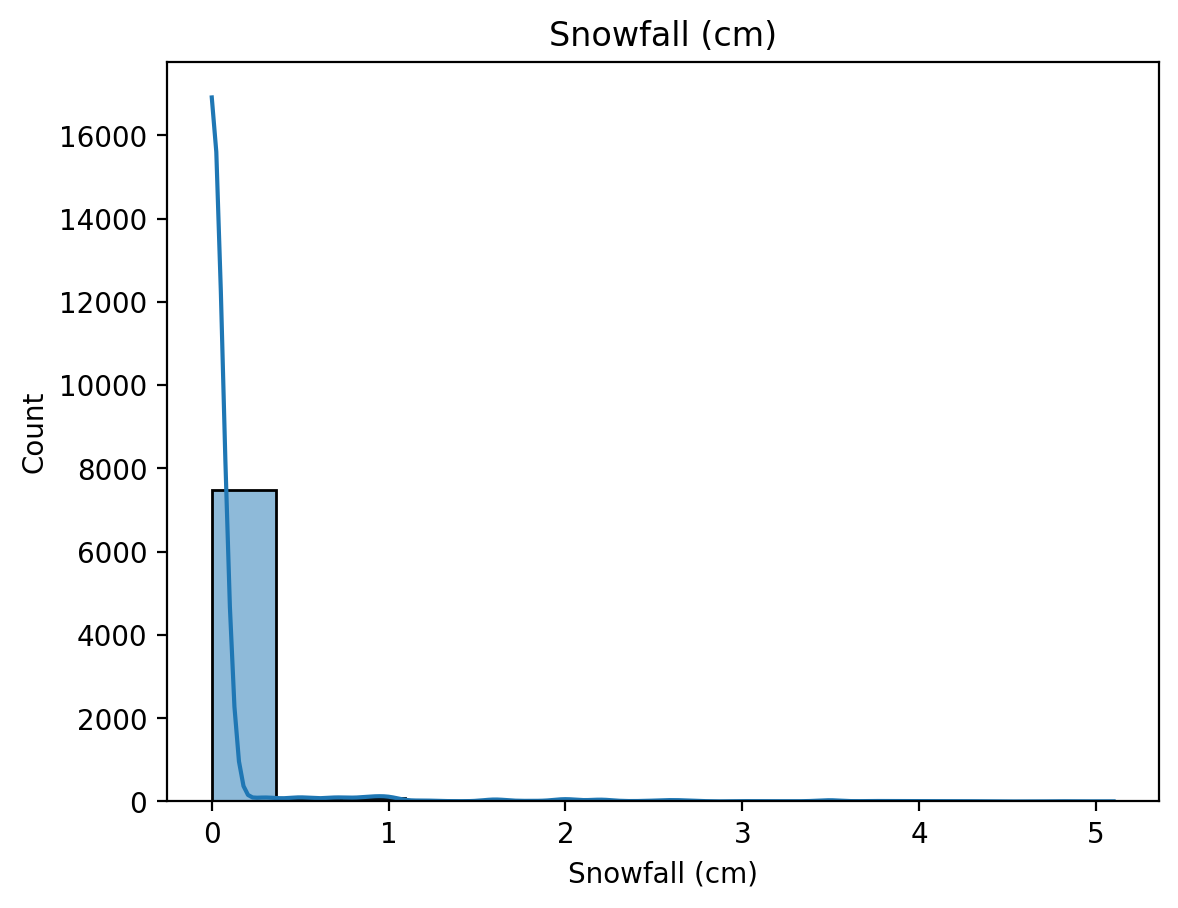

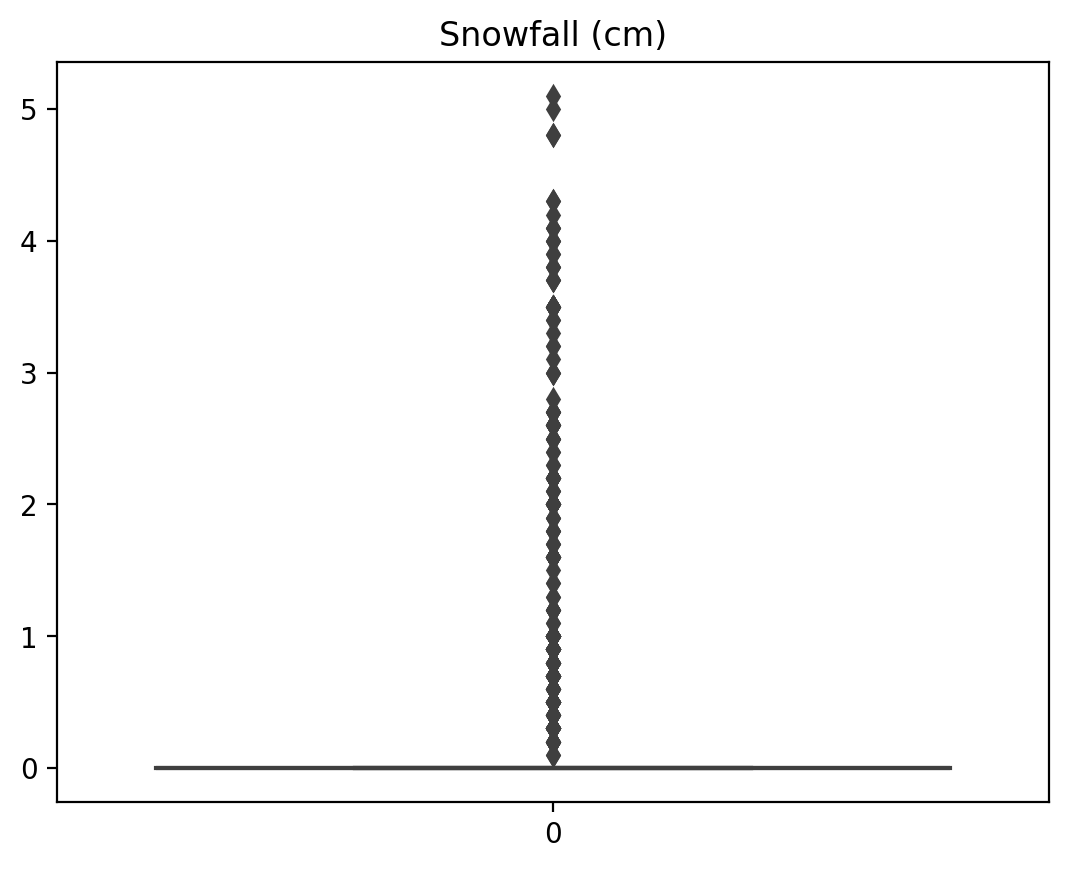

In [56]:
#강설량 변수-히스토그램 
sns.histplot(df3['Snowfall (cm)'],kde=True)
plt.title('Snowfall (cm)')
plt.show()

#강설량 변수- 박스플롯
sns.boxplot(df3['Snowfall (cm)'])
plt.title('Snowfall (cm)')
plt.show()

In [57]:
#눈이 온 낳의 계절 확인해보기 
df3[df3['Snowfall (cm)']>0]['Seasons'].unique()

['Winter']
Categories (4, object): ['Autumn', 'Spring', 'Summer', 'Winter']

##### 겨울에 눈이 올 수 있으므로 이상치가 존재하지는 않는다 

In [58]:
len(df3[df3['Snowfall (cm)']>0]['Date'].unique())

24

##### 따릉이 운행 기간동안 눈이 온 날은 24일이다

## 시간대 변수

시간대 나누기

Morining:6-12

Afternoon:13-18 

Evening:19-23

LateNight:24-5


Morning      2281
Afternoon    1956
LateNight    1950
Evening      1630
Name: hourcat, dtype: int64


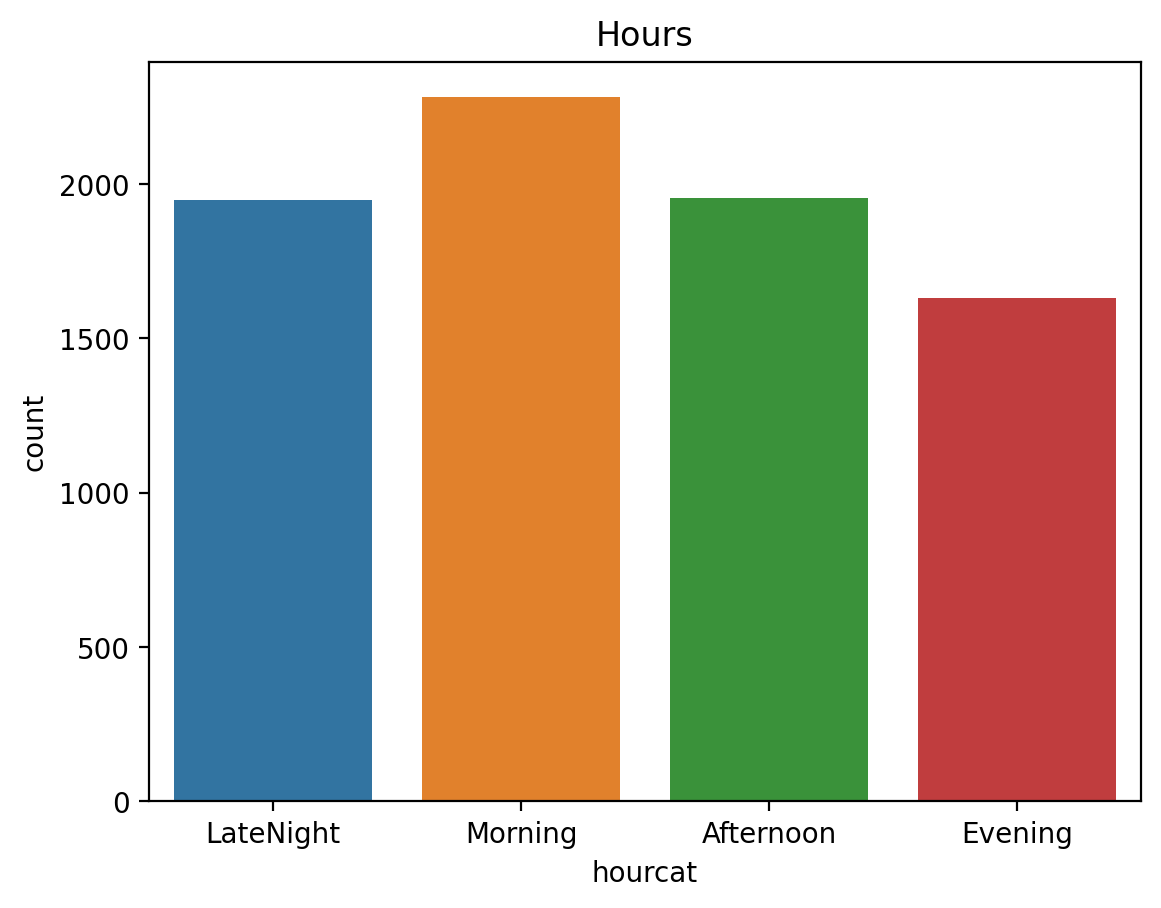

In [61]:
#시간대에 따른 따릉이 대여량의 박스플롯 그리기 

#시간대 나누기 
category=['LateNight','Morning','Afternoon','Evening'] # 시간대 나눌 카테고리 설정하기 
hourcat=pd.cut(x=df4['Hour'],bins=[0,6,13,19,24],labels=category, right=False) #시간대 나누기 
df4['hourcat']=hourcat #데이터 프레임에 새로운 열 생성하기 

#각 시간대 별 개수 
print(df4['hourcat'].value_counts()) 
sns.countplot(x=df4['hourcat'])
plt.title('Hours')
plt.show()

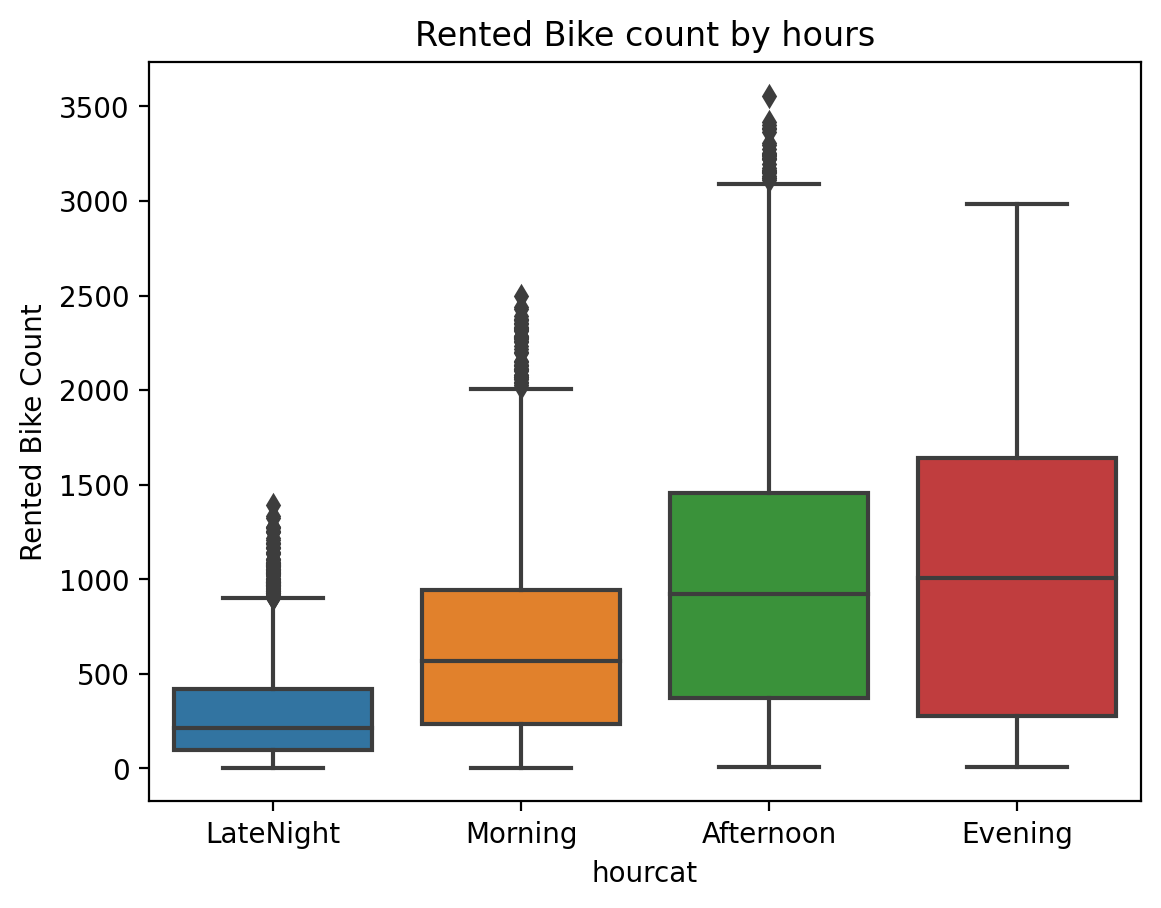

In [62]:
#시간대에 따른 따릉이 대여량 박스플롯 그리기 
sns.boxplot(x=df4['hourcat'], y=df4['Rented Bike Count'])
plt.title('Rented Bike count by hours')
plt.show()

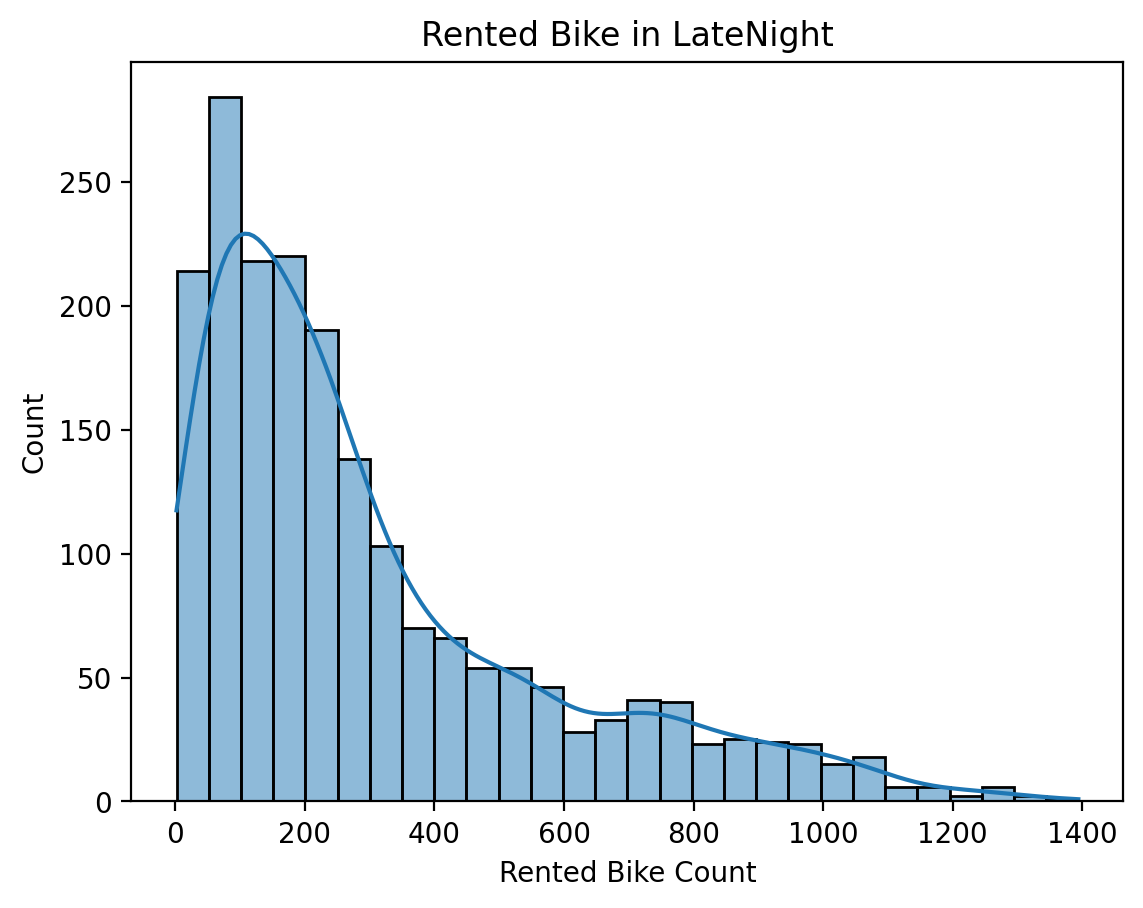

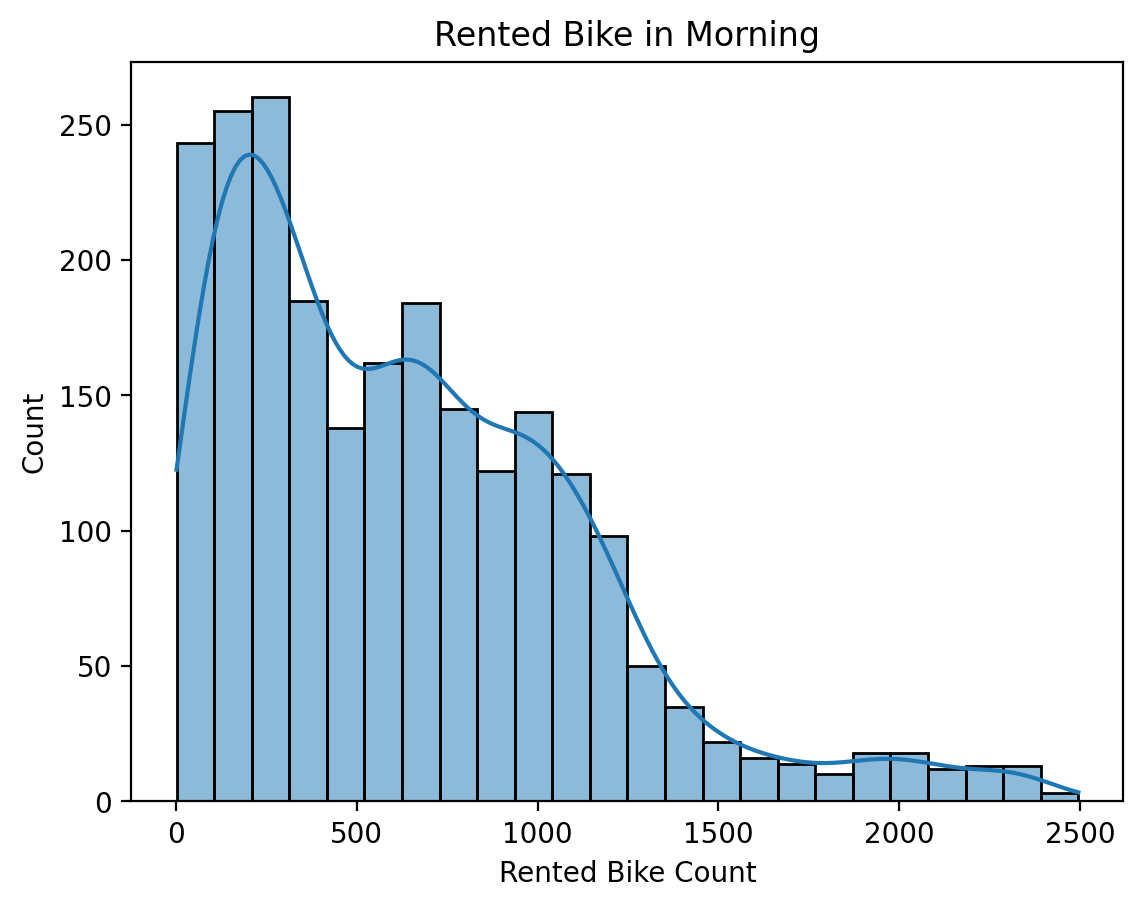

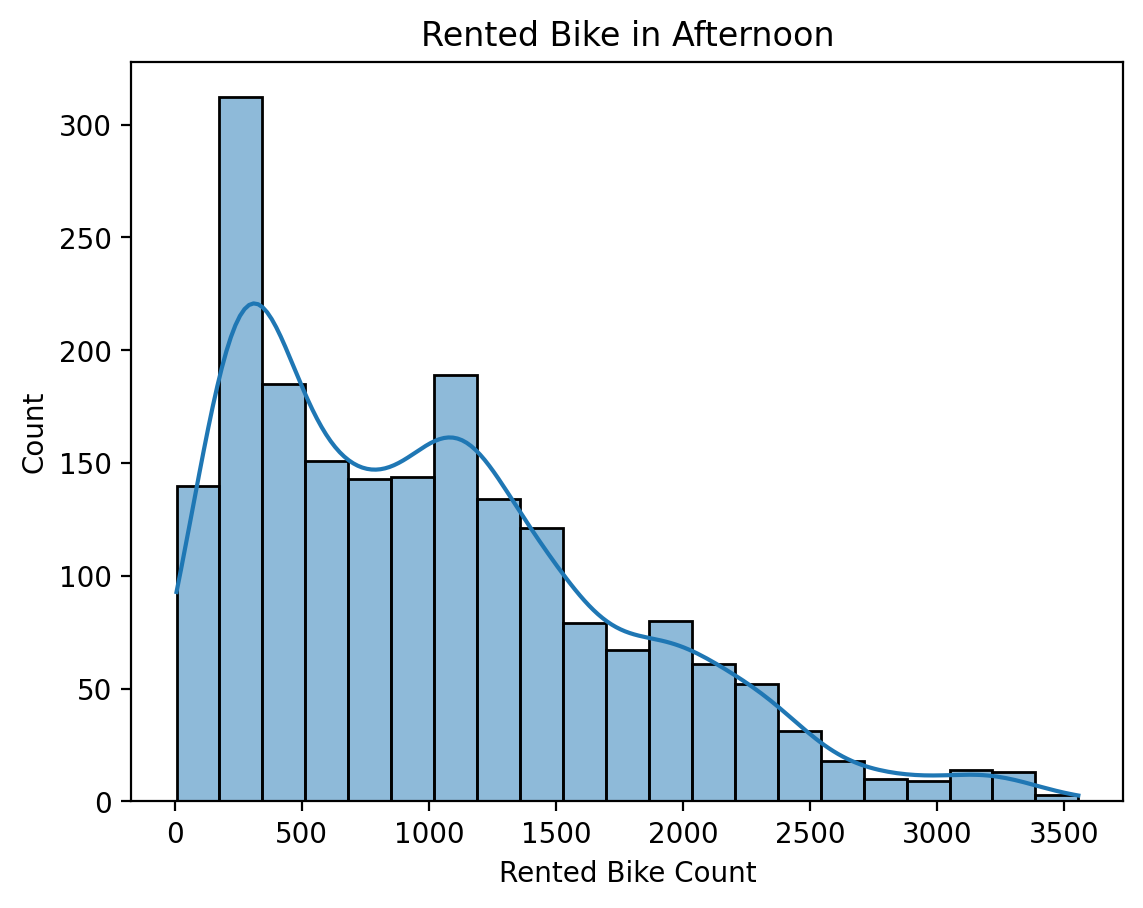

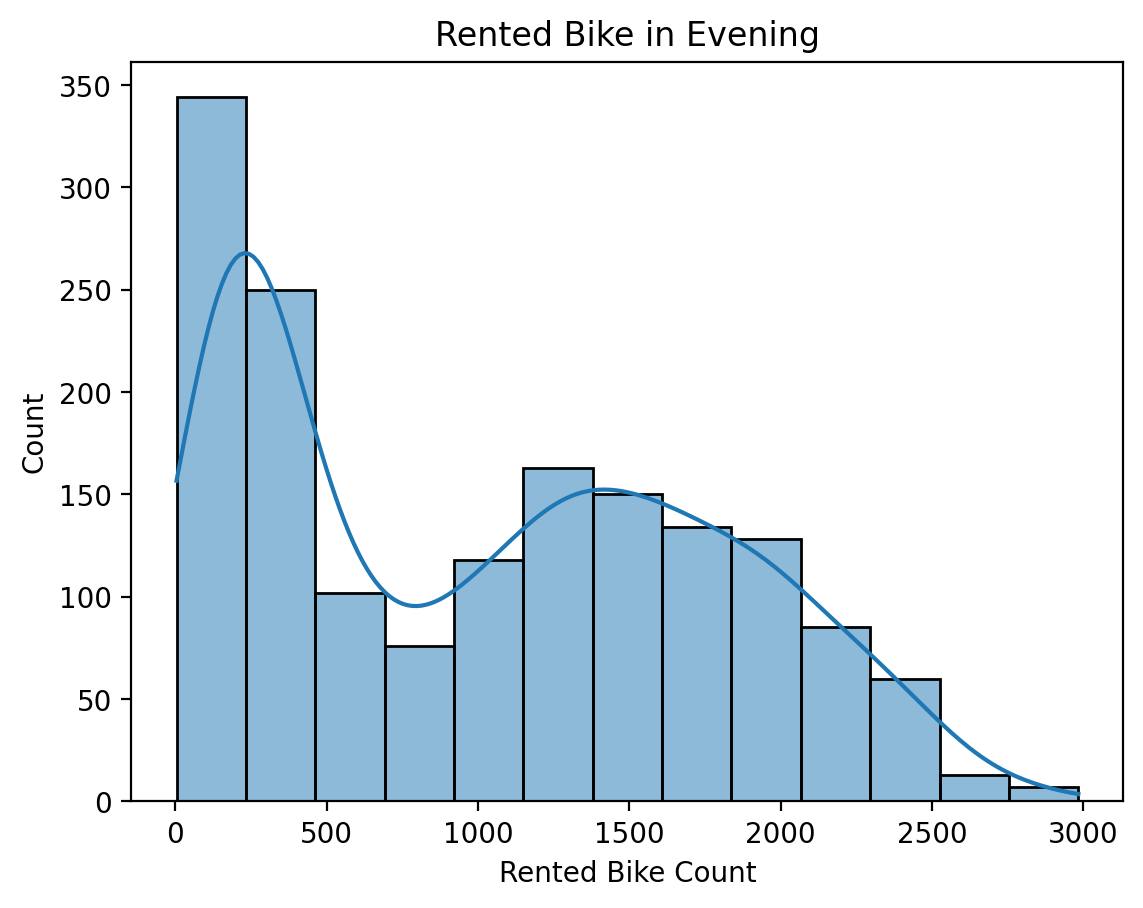

In [63]:
#시간대 별로 나눠서 따릉이 대여량의 히스토그램 그리기 

# LateNight(새벽)의 따릉이 대여량 히스토그램 
sns.histplot(df4[df4['hourcat']=='LateNight']['Rented Bike Count'],kde=True)
plt.title('Rented Bike in LateNight')
plt.show()

#Morning(아침)의 따릉이 대여량 히스토그램
sns.histplot(df4[df4['hourcat']=='Morning']['Rented Bike Count'],kde=True)
plt.title('Rented Bike in Morning')
plt.show()

#Afternooon(오후)의 따릉이 대여량 히스토그램 
sns.histplot(df4[df4['hourcat']=='Afternoon']['Rented Bike Count'],kde=True)
plt.title('Rented Bike in Afternoon')
plt.show()

#Evening( 저녁)의 따릉이 대여량 히스토그램 
sns.histplot(df4[df4['hourcat']=='Evening']['Rented Bike Count'], kde=True)
plt.title('Rented Bike in Evening')
plt.show()


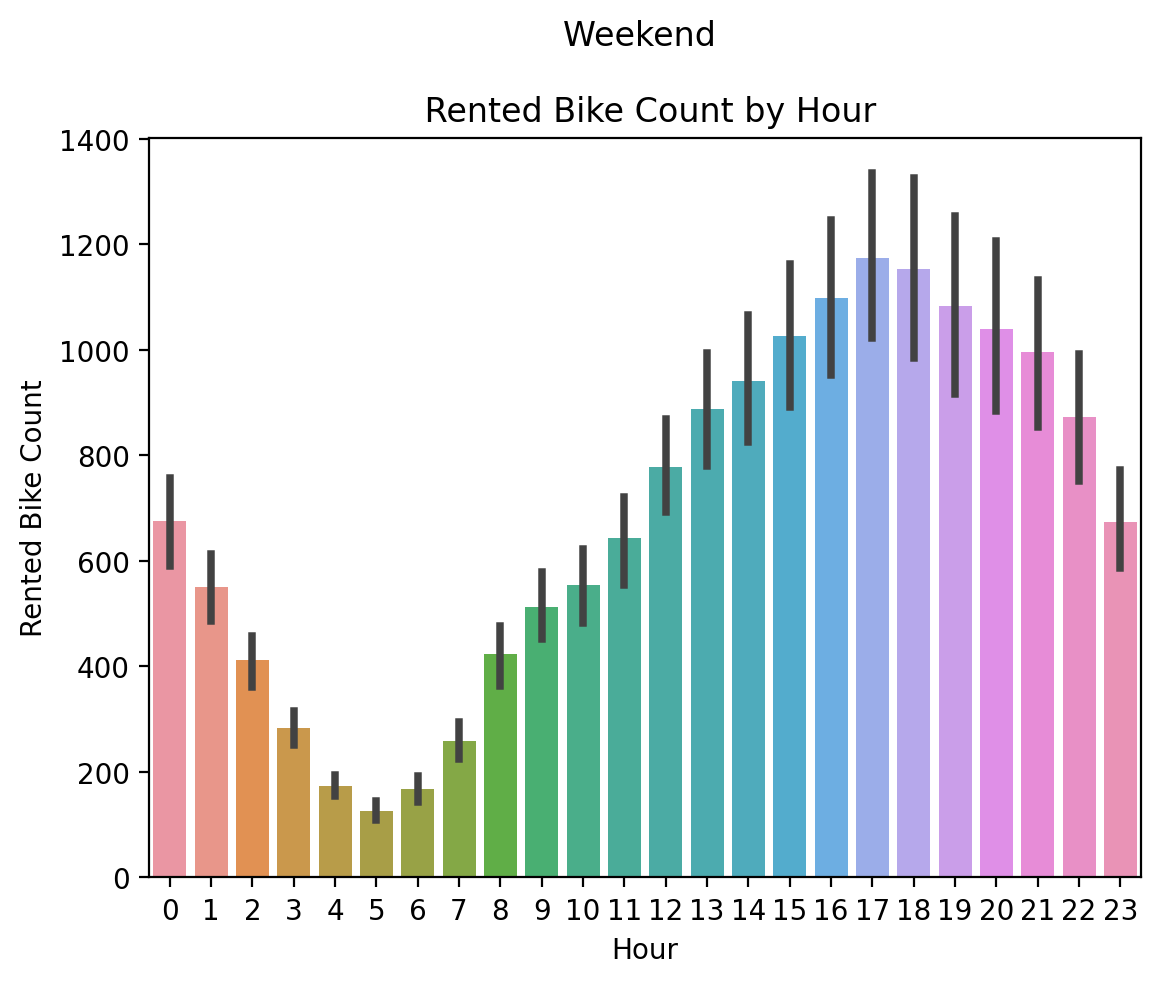

In [64]:
#주말에 시간대별 자전거 대여량 확인하기

#주말로 groupby 하기 
selected_rows = df3[df3['Day_of_Week'].isin(['Sunday', 'Saturday'])]
selected_rows.groupby('Hour')['Rented Bike Count'].mean().reset_index()
#시각화 
sns.barplot(x='Hour',y='Rented Bike Count',data=selected_rows)
plt.title('Weekend \n \n Rented Bike Count by Hour')
plt.show()


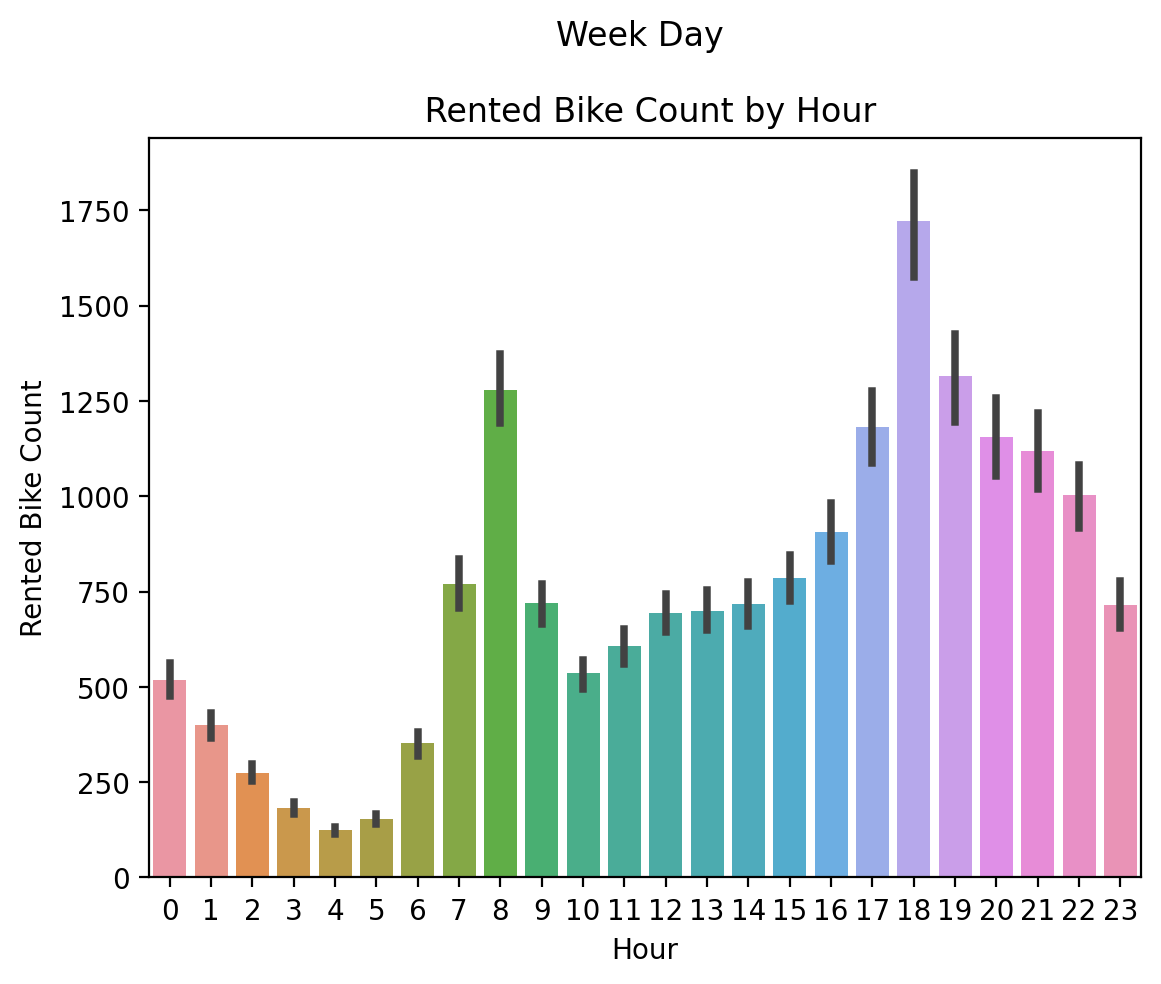

In [65]:
#평일에 시간대별 자전거 대여량 확인하기 

#평일로 그룹화하기 
selected_rows2 = df3[df3['Day_of_Week'].isin(['Friday', 'Monday', 'Thursday', 'Tuesday', 'Wednesday'])]
selected_rows2.groupby('Hour')['Rented Bike Count'].mean().reset_index()

#시각화 
sns.barplot(x='Hour',y='Rented Bike Count',data=selected_rows2)
plt.title('Week Day \n \n Rented Bike Count by Hour')
plt.show()


#### 주말이랑 평일이랑 다른 목적으로 따릉이를 이용할 거 같아서 주말과 평일을 나눠서 분석을 해보았다 

#### 그 결과 주말에는 새벽시간에는 줄고 아침부터 낮 시간까지 서서히 증가하다가 감소하는 경향을 보였으나 
#### 평일의 경우 출퇴근을 위해 따릉이를 대여하므로 출퇴근 시간 대인 7-9시 사이 그리고 17-19 사이 가 가장 따릉이 이용량이 많은 것을 알 수 있다

## 계절 변수

Seasons
Summer     2208
Spring     2160
Winter     2160
Autumn     1289
dtype: int64


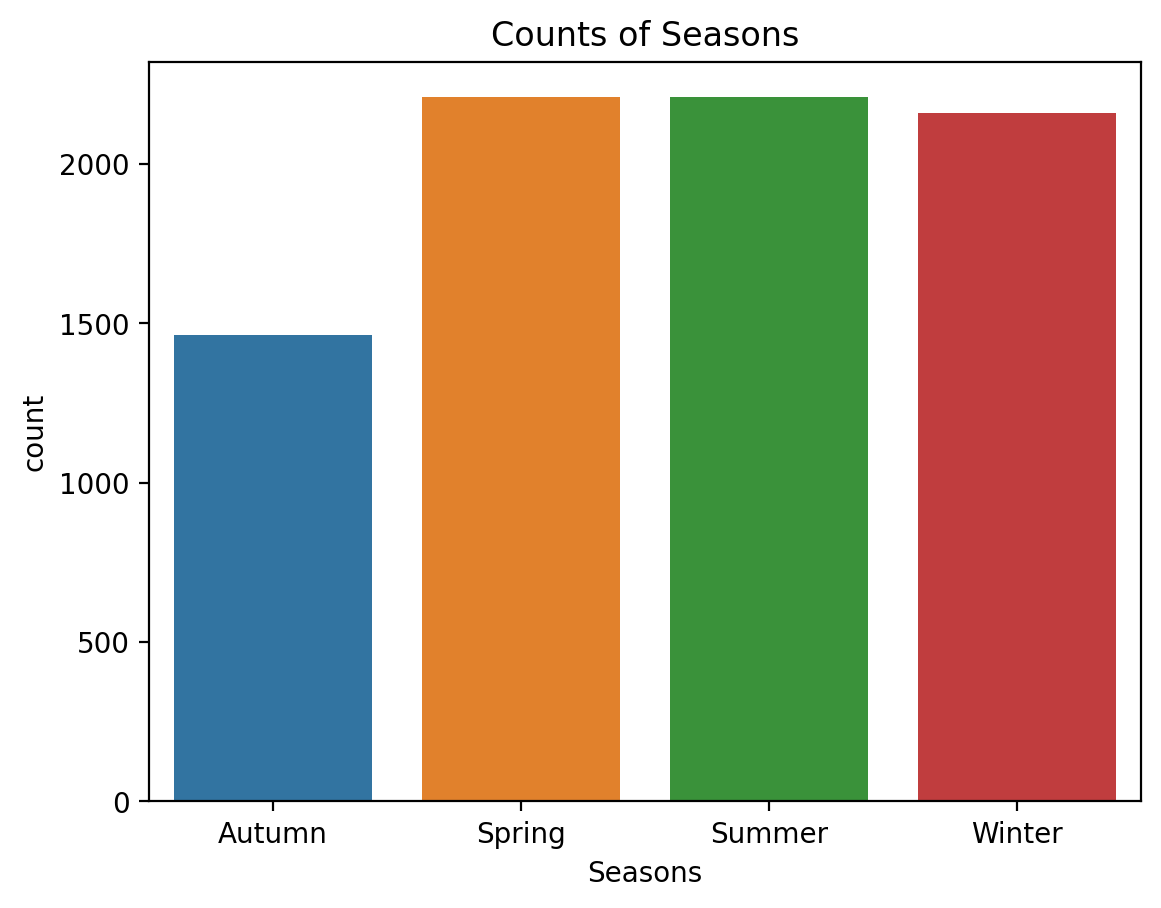

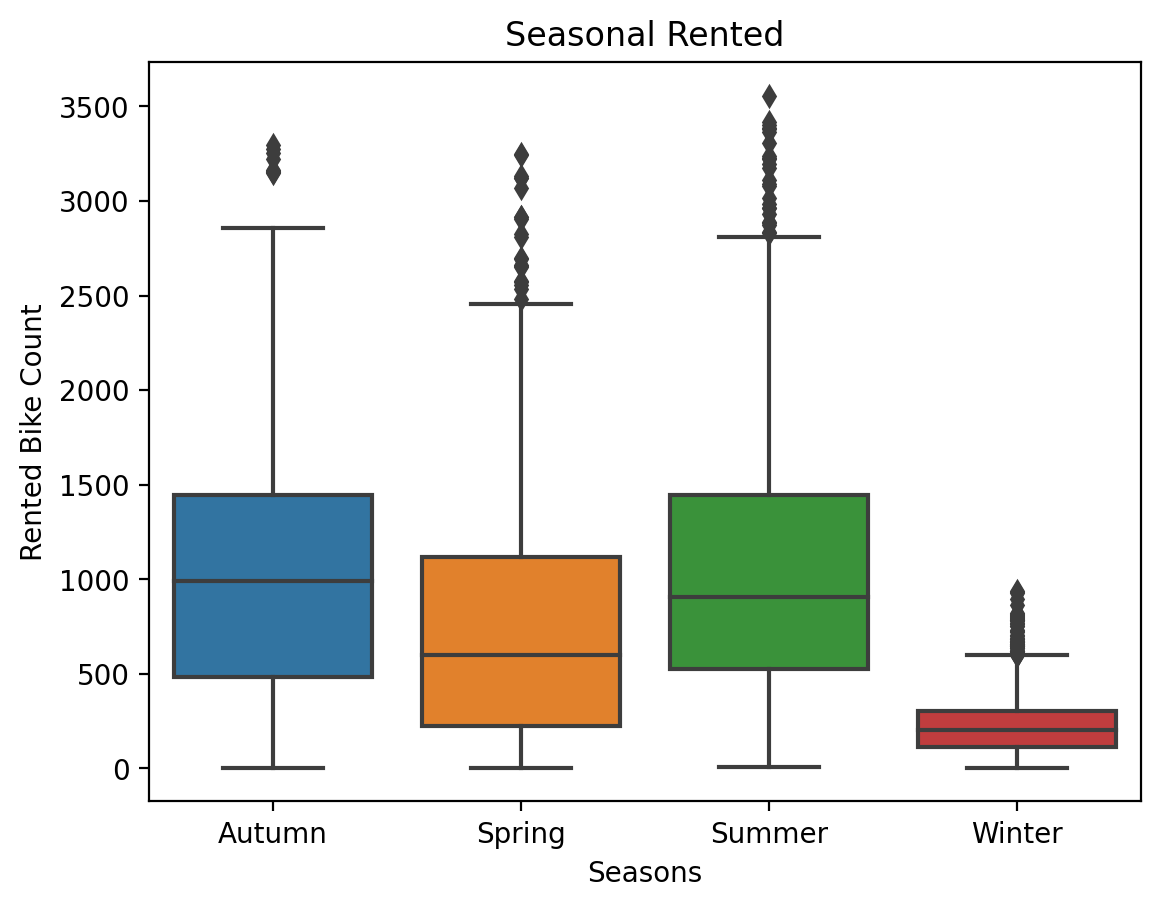

In [66]:
#데이터에서 계절의 수 확인하기 
print(df3[['Seasons']].value_counts())
sns.countplot(x='Seasons',data=df)
plt.title('Counts of Seasons')
plt.show()

#계절에 따른 따릉이 대여량 수 확인하기 -boxplot 
sns.boxplot(x='Seasons',y='Rented Bike Count' , data=df3)
plt.title('Seasonal Rented')
plt.show()



#### 겨울에 평균 따릉이 대여량의 수가 가장 적고 가을에 가장 많았다

## 휴일 변수

##### 휴일인 날의 요일은 어떻게 될까? => 주말 혹은 공휴일인가?

In [67]:
df3[df3['Holiday']=='Holiday']['Date'].unique()

array(['2017-12-22T00:00:00.000000000', '2017-12-24T00:00:00.000000000',
       '2017-12-25T00:00:00.000000000', '2017-12-31T00:00:00.000000000',
       '2018-01-01T00:00:00.000000000', '2018-02-15T00:00:00.000000000',
       '2018-02-16T00:00:00.000000000', '2018-02-17T00:00:00.000000000',
       '2018-03-01T00:00:00.000000000', '2018-05-01T00:00:00.000000000',
       '2018-05-22T00:00:00.000000000', '2018-06-06T00:00:00.000000000',
       '2018-08-15T00:00:00.000000000', '2018-09-23T00:00:00.000000000',
       '2018-09-24T00:00:00.000000000', '2018-09-25T00:00:00.000000000',
       '2018-10-03T00:00:00.000000000'], dtype='datetime64[ns]')

In [74]:
df5=df3[df3['Holiday']=='Holiday']

<Axes: xlabel='Rented Bike Count', ylabel='Count'>

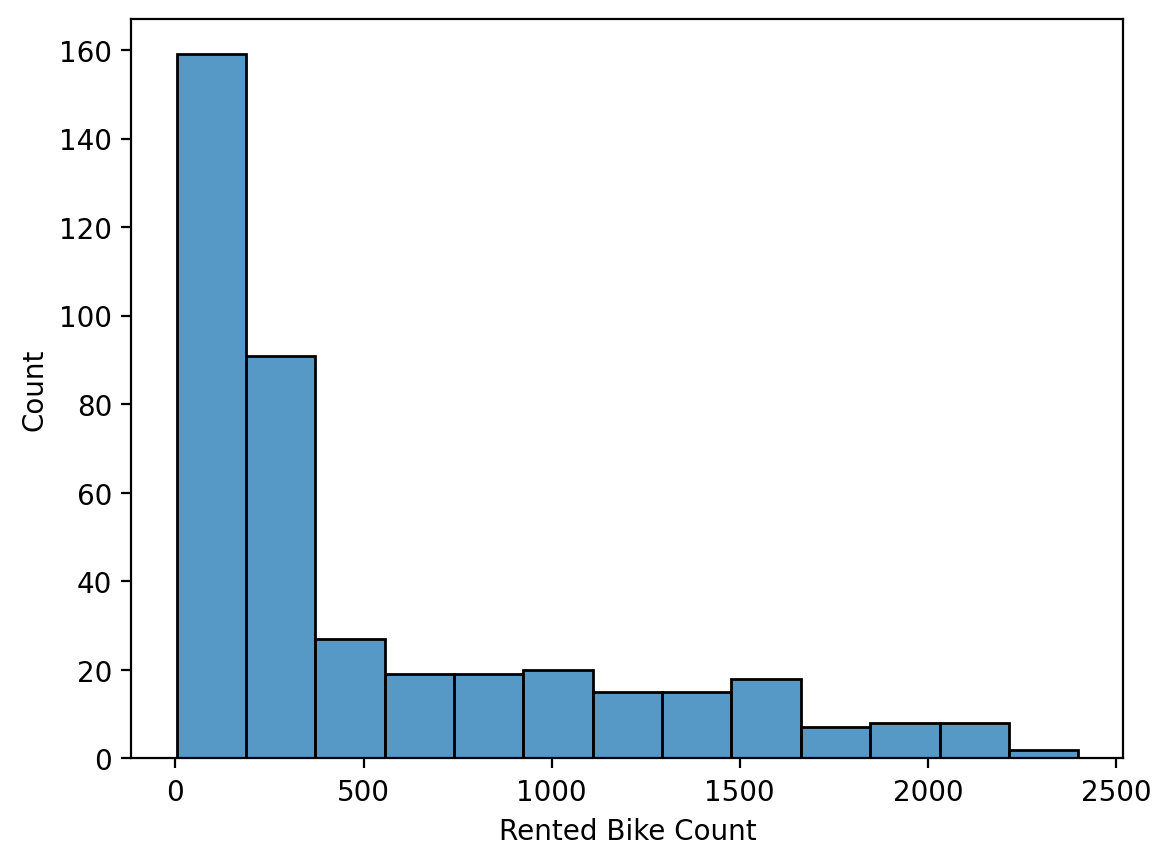

In [76]:
#휴일인 날의 자전거 대여량 히스토그램 그리기
sns.histplot(df5['Rented Bike Count'])

Holiday   
No Holiday    7409
Holiday        408
dtype: int64


<Axes: xlabel='Holiday', ylabel='count'>

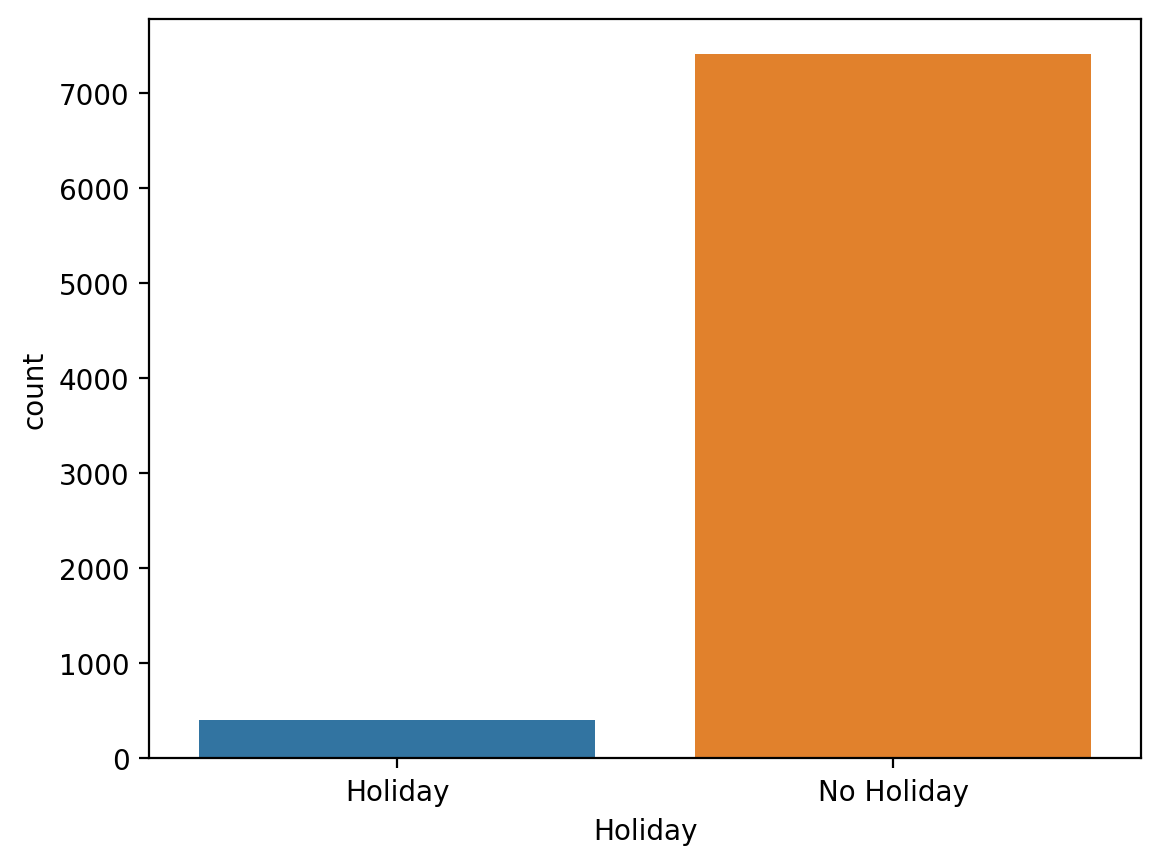

In [77]:
#휴일인 날과 아닌 날의 barplot 그리기
print(df3[['Holiday']].value_counts())
sns.countplot(x='Holiday',data=df3)

<Axes: xlabel='Rented Bike Count', ylabel='Density'>

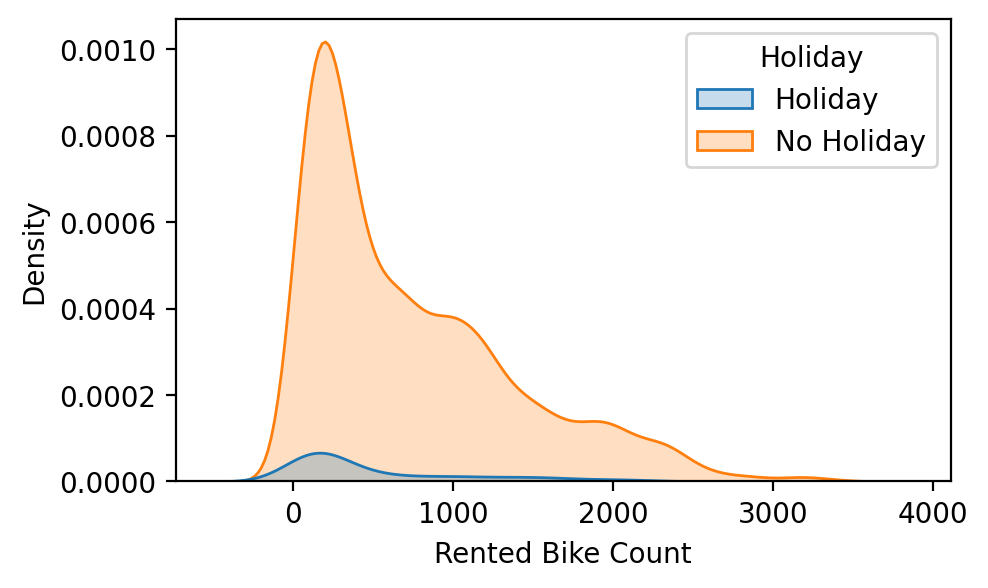

In [78]:
## holiday일때와 no holiday 일때의 따릉이 대여량 히스토그램 분포를 같이 나타내기 

plt.figure(figsize=(5,3))
sns.kdeplot(x='Rented Bike Count', data=df3, hue='Holiday', shade=True )



## 날짜 변수

In [70]:
df['Date']

0      2017-12-01
1      2017-12-01
2      2017-12-01
3      2017-12-01
4      2017-12-01
          ...    
8035   2018-10-31
8036   2018-10-31
8037   2018-10-31
8038   2018-10-31
8039   2018-10-31
Name: Date, Length: 8040, dtype: datetime64[ns]

In [73]:
print(len(df['Date'].unique()))
print(len(df3['Date'].unique()))

335
326


#### 전체 데이터는 335일 
#### 운행한 날의 데이터는 326일 이다

## 요일 변수

In [203]:
#주말의 평균 자전거 대여량 확인하기
selected_rows = df3[df3['Day_of_Week'].isin(['Sunday', 'Saturday'])]
print(f"주말 평균 자전거 대여량:{selected_rows['Rented Bike Count'].mean()}")

주말 평균 자전거 대여량:688.9164100307963


In [204]:
#평일의 평균 자전거 대여량 확인하기 
selected_rows2 = df3[df3['Day_of_Week'].isin(['Friday', 'Monday', 'Thursday', 'Tuesday', 'Wednesday'])]
print(f"평일 평균 자전거 대여량:{selected_rows2['Rented Bike Count'].mean()}")

평일 평균 자전거 대여량:746.8780663780664


# 이상치 처리
#### 각 변수들에서 이상치로 판단되는 경우는 존재하지 않았다

# 1차 전처리 결론 

#### 본 분석에 쓰인 데이터는 2017.12.01 - 2018.10.31 동안 335일의 시간 별 따릉이 대여량과 기상변수들에 대한 것이다

##### 이상치와 결측치 
처음 결측치 처리한 것들을 제외한 다른 부분에서는 결측치로 의심되는 데이터는 존재하지 않았다 
또한 이상치라 판단되는 경우도 존재하지 않았다


##### EDA 결과 
1.따릉이의 목적에 따른 대여량 변화 

본 EDA를 하기 전 따릉이의 주 목적을 크게 출퇴근용과 여가용으로 생각해보았다. 그리고 해당 가정은 평일과 주말을 나눠서 시각화한 것을봤을 때 유의미한 가정이었다 생각한다. 

평일에는 평균 746대를 대여하며,  출퇴근 시간인 7-9시 사이 그리고 17-19 사이 가 가장 따릉이 이용량이 많은 것을 알 수 있다. 
주말에는 평균 688대를 대여하며, 여가용으로 주로 이용하므로 새벽시간에는 줄고 아침부터 낮 시간까지 서서히 증가하다가 감소하는 경향을 보였다.


2.따릉이를 운영하지 않는 날의 특징 

따릉이를 운영하지 않는 날은 주로 기상악화 현상이 있는 날이나 특별한 날일 것이라고 생각하였다.

그러나 따릉이를 운영하지 않는 날을 분석을 해보았을 때 유의미하게 기상악화가 있는 날이 존재하지 않았다. 또한 날짜를 따로 구해보았을 때 특별한 날이 존재하지 않았다. 

3. 이외 

따릉이 대여량은 영하의 날씨에서 평균적으로 가장 낮은 대여량을 보여주고 20도에서 40도 사이에 가장 많았다. 
계절로 보았을 때는 겨울에 평균 따릉이 대여량의 수가 가장 적고 가을에 가장 많았다


# 1차 전처리 데이터
1차 전처리 과정이 진행된 파일을 저장해준다 

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8040 entries, 0 to 8039
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         8040 non-null   datetime64[ns]
 1   Rented Bike Count            8040 non-null   int64         
 2   Hour                         8040 non-null   int64         
 3   Temperature(ì§¸C)            8040 non-null   float64       
 4   Humidity(%)                  8040 non-null   int64         
 5   Wind speed (m/s)             8040 non-null   float64       
 6   Visibility (10m)             8040 non-null   int64         
 7   Dew point temperature(ì§¸C)  8040 non-null   float64       
 8   Solar Radiation (MJ/m2)      8040 non-null   float64       
 9   Rainfall(mm)                 8040 non-null   float64       
 10  Snowfall (cm)                8040 non-null   float64       
 11  Seasons                      8040 non-null 

In [82]:
df.to_csv("Bike_clean.csv", index=False)